In [11]:
import sys
sys.path.append('..')  # Add parent directory to path
from utils.backtest import Backtest
from utils.data_handler import DataHandler

from strategies.ratio_value import RatioValueStrategy
from strategies.momentum import MomentumStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd

In [13]:
import pandas as pd

# Define tickers and parameter grid
tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] # Add more tickers as needed
frequencies = ['weekly', 'monthly', '6month']
K = [0.5, 1, 1.5]

# Initialize final results container
all_results = {}
best_params = []

# Loop over each ticker
for ticker in tickers:
    print(f"\n--- Evaluating {ticker} ---")

    try:
        # Initialize data
        data_handler = DataHandler(ticker=ticker, start_date='2004-12-12', end_date='2015-12-12')
        prices = data_handler.fetch_data()
        pe_series = data_handler.fetch_pe_series('../data/PE RATIO.xlsx')

        if pe_series.empty:
            print(f"Skipping {ticker}: No valid PE data in selected date range.")
            continue

        results = {}

        # Loop over each frequency and threshold
        for freq in frequencies:
            results[freq] = {}
            for thresh in K:
                print(f"\nTesting {freq} frequency strategy with k={thresh} for {ticker}:")

                # Initialize strategy
                strategy = RatioValueStrategy(pe_series, "PE", window=5, k=thresh, frequency=freq)

                # Run backtest
                backtest = Backtest(
                    data=prices,
                    strategy=strategy,
                    plot_results=False
                )

                # Store results
                result = backtest.run()
                results[freq][thresh] = result

                # Print metrics
                print(f"Final Portfolio Value: ${result['Final Value']:,.2f}")
                print(f"Total Return: {result['Return']:.2%}")
                print(f"Sharpe Ratio: {result['Sharpe Ratio']:.2f}")
                print(f"Max Drawdown: {result['Max Drawdown']:.2%}")

        # Save all results for this ticker
        all_results[ticker] = results

        # Flatten and create comparison DataFrame
        comparison = pd.concat({
            freq: pd.DataFrame.from_dict(results[freq], orient='index')
            for freq in frequencies
        }, names=['Frequency', 'k'])

        # Find best combo based on Sharpe Ratio
        best_idx = comparison['Sharpe Ratio'].idxmax()
        best_row = comparison.loc[best_idx]
        best_params.append({
            'Ticker': ticker,
            'Best Frequency': best_idx[0],
            'Best k': best_idx[1],
            'Sharpe Ratio': best_row['Sharpe Ratio'],
            'Total Return': best_row['Return'],
            'Final Value': best_row['Final Value'],
            'Max Drawdown': best_row['Max Drawdown']
        })

        # Optionally show per-stock comparison table
        print("\nStrategy Comparison Table:")
        print(comparison.round(4))

    except Exception as e:
        print(f"Skipping {ticker} due to error: {e}")
        continue

# Convert best parameter summary to DataFrame
best_params_df = pd.DataFrame(best_params)
print("\n=== Summary of Best Parameters by Ticker ===")
print(best_params_df.round(4))


[*********************100%***********************]  1 of 1 completed


--- Evaluating AAPL ---



Testing weekly frequency strategy with k=0.5 for AAPL:
Final Portfolio Value: $136,698.03
Total Return: 36.70%
Sharpe Ratio: 0.24
Max Drawdown: -65.41%

Testing weekly frequency strategy with k=1 for AAPL:
Final Portfolio Value: $241,264.13
Total Return: 141.26%
Sharpe Ratio: 0.44
Max Drawdown: -58.06%

Testing weekly frequency strategy with k=1.5 for AAPL:
Final Portfolio Value: $170,399.95
Total Return: 70.40%
Sharpe Ratio: 0.32
Max Drawdown: -64.68%

Testing monthly frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,202.49
Total Return: 152.20%
Sharpe Ratio: 0.45
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,602.31
Total Return: 108.60%
Sharpe Ratio: 0.39
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,409.00
Total Return: 46.41%
Sharpe Ratio: 0.27
Max Drawdown: -58.83%

Testing 6month frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $1,172,900.17
Total Return: 1072.90%
Sharpe Ratio: 0.88
Max Drawdown: -60.87%

Testing 6month frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $655,702.67
Total Return: 555.70%
Sharpe Ratio: 0.84
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
                Final Value   Return  Sharpe Ratio  Max Drawdown
Frequency k                                                     
weekly    0.5  1.366980e+05   0.3670        0.2399       -0.6541
          1.0  2.412641e+05   1.4126        0.4371       -0.5806
          1.5  1.703999e+05   0.7040        0.3180       -0.6468
monthly   0.5  2.522025e+05   1.5220        0.4480       -0.5883
          1.0  2.086023e+05   1.0860        0.3881       -0.5883
          1.5  1.464090e+05   0.4641        0.2688       -0.5883
6month    0.5  1.172900e+06  10.7290        0.8773       -0.6087
          1.0  6.557027e+05   5.5570        0.8434       -0.4380
          1.5  1.000000e+05   0.0000           NaN        0.0000

--- Evaluating ABT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ABT:
Final Portfolio Value: $66,933.37
Total Return: -33.07%
Sharpe Ratio: -0.16
Max Drawdown: -41.43%

Testing weekly frequency strategy with k=1 for ABT:
Final Portfolio Value: $78,922.92
Total Return: -21.08%
Sharpe Ratio: -0.06
Max Drawdown: -39.17%

Testing weekly frequency strategy with k=1.5 for ABT:
Final Portfolio Value: $133,801.82
Total Return: 33.80%
Sharpe Ratio: 0.24
Max Drawdown: -29.39%

Testing monthly frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,131.70
Total Return: 17.13%
Sharpe Ratio: 0.17
Max Drawdown: -28.92%

Testing monthly frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,491.42
Total Return: 81.49%
Sharpe Ratio: 0.42
Max Drawdown: -28.93%

Testing monthly frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $151,682.97
Total Return: 51.68%
Sharpe Ratio: 0.32
Max Drawdown: -28.93%

Testing 6month frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,102.68
Total Return: 83.10%
Sharpe Ratio: 0.43
Max Drawdown: -28.93%

Testing 6month frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,176.84
Total Return: 40.18%
Sharpe Ratio: 0.29
Max Drawdown: -28.92%

Testing 6month frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,951.24
Total Return: 107.95%
Sharpe Ratio: 0.48
Max Drawdown: -28.92%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   66933.3678 -0.3307       -0.1583       -0.4143
          1.0   78922.9166 -0.2108       -0.0586       -0.3917
          1.5  133801.8246  0.3380        0.2437       -0.2939
monthly   0.5  117131.6969  0.1713        0.1702       -0.2892
          1.0  181491.4222  0.8149        0.4180       -0.2893
          1.5  151682.9698  0.5168        0.3223       -0.2893
6month    0.5  183102.6788  0.8310        0.4259       -0.2893
          1.0  140176.8401  0.4018        0.2936       -0.2892
          1.5  207951.2446  1.0795        0.4805       -0.2892

--- Evaluating ADI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADI:
Final Portfolio Value: $110,124.61
Total Return: 10.12%
Sharpe Ratio: 0.14
Max Drawdown: -29.87%

Testing weekly frequency strategy with k=1 for ADI:
Final Portfolio Value: $109,581.60
Total Return: 9.58%
Sharpe Ratio: 0.13
Max Drawdown: -24.19%

Testing weekly frequency strategy with k=1.5 for ADI:
Final Portfolio Value: $129,501.84
Total Return: 29.50%
Sharpe Ratio: 0.29
Max Drawdown: -19.80%

Testing monthly frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,172.87
Total Return: 43.17%
Sharpe Ratio: 0.36
Max Drawdown: -22.18%

Testing monthly frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,558.39
Total Return: 31.56%
Sharpe Ratio: 0.31
Max Drawdown: -18.31%

Testing monthly frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,781.76
Total Return: 38.78%
Sharpe Ratio: 0.30
Max Drawdown: -26.38%

Testing 6month frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,560.40
Total Return: 30.56%
Sharpe Ratio: 0.37
Max Drawdown: -11.01%

Testing 6month frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,465.25
Total Return: 35.47%
Sharpe Ratio: 0.38
Max Drawdown: -11.01%

Testing 6month frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed

Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  110124.6143  0.1012        0.1350       -0.2987
          1.0  109581.6033  0.0958        0.1305       -0.2419
          1.5  129501.8382  0.2950        0.2902       -0.1980
monthly   0.5  143172.8689  0.4317        0.3637       -0.2218
          1.0  131558.3904  0.3156        0.3052       -0.1831
          1.5  138781.7606  0.3878        0.3048       -0.2638
6month    0.5  130560.3972  0.3056        0.3699       -0.1101
          1.0  135465.2467  0.3547        0.3762       -0.1101
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADM ---



Testing weekly frequency strategy with k=0.5 for ADM:
Final Portfolio Value: $57,823.53
Total Return: -42.18%
Sharpe Ratio: -0.08
Max Drawdown: -70.00%

Testing weekly frequency strategy with k=1 for ADM:
Final Portfolio Value: $90,745.60
Total Return: -9.25%
Sharpe Ratio: 0.09
Max Drawdown: -65.53%

Testing weekly frequency strategy with k=1.5 for ADM:
Final Portfolio Value: $138,145.86
Total Return: 38.15%
Sharpe Ratio: 0.24
Max Drawdown: -65.72%

Testing monthly frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,889.09
Total Return: -25.11%
Sharpe Ratio: 0.02
Max Drawdown: -70.30%

Testing monthly frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,727.85
Total Return: -13.27%
Sharpe Ratio: 0.08
Max Drawdown: -58.10%

Testing monthly frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $247,597.25
Total Return: 147.60%
Sharpe Ratio: 0.53
Max Drawdown: -39.20%

Testing 6month frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,646.61
Total Return: 24.65%
Sharpe Ratio: 0.21
Max Drawdown: -67.99%

Testing 6month frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,109.81
Total Return: 126.11%
Sharpe Ratio: 0.44
Max Drawdown: -35.14%

Testing 6month frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,035.02
Total Return: 88.04%
Sharpe Ratio: 0.36
Max Drawdown: -35.14%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   57823.5270 -0.4218       -0.0842       -0.7000
          1.0   90745.6021 -0.0925        0.0888       -0.6553
          1.5  138145.8648  0.3815        0.2442       -0.6572
monthly   0.5   74889.0897 -0.2511        0.0199       -0.7030
          1.0   86727.8479 -0.1327        0.0799       -0.5810
          1.5  247597.2524  1.4760        0.5299       -0.3920
6month    0.5  124646.6053  0.2465        0.2120       -0.6799
          1.0  226109.8097  1.2611        0.4426       -0.3514
          1.5  188035.0207  0.8804        0.3596       -0.3514

--- Evaluating ADP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADP:
Final Portfolio Value: $119,002.38
Total Return: 19.00%
Sharpe Ratio: 0.19
Max Drawdown: -19.17%

Testing weekly frequency strategy with k=1 for ADP:
Final Portfolio Value: $165,596.67
Total Return: 65.60%
Sharpe Ratio: 0.40
Max Drawdown: -13.64%

Testing weekly frequency strategy with k=1.5 for ADP:
Final Portfolio Value: $186,862.74
Total Return: 86.86%
Sharpe Ratio: 0.50
Max Drawdown: -19.03%

Testing monthly frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,796.92
Total Return: 69.80%
Sharpe Ratio: 0.44
Max Drawdown: -20.06%

Testing monthly frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,617.89
Total Return: 46.62%
Sharpe Ratio: 0.45
Max Drawdown: -15.95%

Testing monthly frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,303.32
Total Return: 21.30%
Sharpe Ratio: 0.46
Max Drawdown: -8.16%

Testing 6month frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,388.26
Total Return: 35.39%
Sharpe Ratio: 0.31
Max Drawdown: -19.63%

Testing 6month frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,652.72
Total Return: 126.65%
Sharpe Ratio: 0.59
Max Drawdown: -19.63%

Testing 6month frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  119002.3826  0.1900        0.1902       -0.1917
          1.0  165596.6715  0.6560        0.4033       -0.1364
          1.5  186862.7434  0.8686        0.4980       -0.1903
monthly   0.5  169796.9202  0.6980        0.4437       -0.2006
          1.0  146617.8902  0.4662        0.4461       -0.1595
          1.5  121303.3228  0.2130        0.4621       -0.0816
6month    0.5  135388.2573  0.3539        0.3058       -0.1963
          1.0  226652.7244  1.2665        0.5854       -0.1963
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADSK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADSK:
Final Portfolio Value: $59,402.44
Total Return: -40.60%
Sharpe Ratio: -0.03
Max Drawdown: -72.28%

Testing weekly frequency strategy with k=1 for ADSK:
Final Portfolio Value: $57,936.62
Total Return: -42.06%
Sharpe Ratio: -0.04
Max Drawdown: -69.32%

Testing weekly frequency strategy with k=1.5 for ADSK:
Final Portfolio Value: $128,546.44
Total Return: 28.55%
Sharpe Ratio: 0.22
Max Drawdown: -65.86%

Testing monthly frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $52,286.47
Total Return: -47.71%
Sharpe Ratio: -0.05
Max Drawdown: -76.91%

Testing monthly frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $43,012.51
Total Return: -56.99%
Sharpe Ratio: -0.10
Max Drawdown: -74.06%

Testing monthly frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $58,006.25
Total Return: -41.99%
Sharpe Ratio: -0.01
Max Drawdown: -74.05%

Testing 6month frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,091.34
Total Return: -33.91%
Sharpe Ratio: 0.01
Max Drawdown: -76.91%

Testing 6month frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,458.91
Total Return: 17.46%
Sharpe Ratio: 0.20
Max Drawdown: -76.91%

Testing 6month frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $179,453.67
Total Return: 79.45%
Sharpe Ratio: 0.33
Max Drawdown: -49.10%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   59402.4361 -0.4060       -0.0321       -0.7228
          1.0   57936.6150 -0.4206       -0.0430       -0.6932
          1.5  128546.4408  0.2855        0.2247       -0.6586
monthly   0.5   52286.4704 -0.4771       -0.0457       -0.7691
          1.0   43012.5088 -0.5699       -0.0970       -0.7406
          1.5   58006.2514 -0.4199       -0.0060       -0.7405
6month    0.5   66091.3426 -0.3391        0.0054       -0.7691
          1.0  117458.9076  0.1746        0.1991       -0.7691
          1.5  179453.6732  0.7945        0.3303       -0.4910

--- Evaluating AEE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEE:
Final Portfolio Value: $73,221.34
Total Return: -26.78%
Sharpe Ratio: -0.09
Max Drawdown: -51.16%

Testing weekly frequency strategy with k=1 for AEE:
Final Portfolio Value: $89,057.98
Total Return: -10.94%
Sharpe Ratio: 0.02
Max Drawdown: -49.73%

Testing weekly frequency strategy with k=1.5 for AEE:
Final Portfolio Value: $152,820.70
Total Return: 52.82%
Sharpe Ratio: 0.31
Max Drawdown: -46.08%

Testing monthly frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,819.91
Total Return: 4.82%
Sharpe Ratio: 0.11
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,985.54
Total Return: -13.01%
Sharpe Ratio: 0.01
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,414.47
Total Return: -28.59%
Sharpe Ratio: -0.11
Max Drawdown: -55.69%

Testing 6month frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,929.78
Total Return: -24.07%
Sharpe Ratio: -0.08
Max Drawdown: -51.59%

Testing 6month frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,929.78
Total Return: -24.07%
Sharpe Ratio: -0.08
Max Drawdown: -51.59%

Testing 6month frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed

Final Portfolio Value: $156,729.51
Total Return: 56.73%
Sharpe Ratio: 0.35
Max Drawdown: -42.36%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73221.3434 -0.2678       -0.0889       -0.5116
          1.0   89057.9815 -0.1094        0.0180       -0.4973
          1.5  152820.7041  0.5282        0.3105       -0.4608
monthly   0.5  104819.9136  0.0482        0.1137       -0.5569
          1.0   86985.5417 -0.1301        0.0142       -0.5569
          1.5   71414.4655 -0.2859       -0.1115       -0.5569
6month    0.5   75929.7807 -0.2407       -0.0764       -0.5159
          1.0   75929.7807 -0.2407       -0.0764       -0.5159
          1.5  156729.5124  0.5673        0.3522       -0.4236

--- Evaluating AEP ---


Skipping AEP due to error: No valid PE data for ticker 'AEP' between 2004-12-12 and 2015-12-12

--- Evaluating AJG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AJG:
Final Portfolio Value: $63,885.87
Total Return: -36.11%
Sharpe Ratio: -0.14
Max Drawdown: -54.70%

Testing weekly frequency strategy with k=1 for AJG:
Final Portfolio Value: $106,205.90
Total Return: 6.21%
Sharpe Ratio: 0.12
Max Drawdown: -48.11%

Testing weekly frequency strategy with k=1.5 for AJG:
Final Portfolio Value: $145,614.98
Total Return: 45.61%
Sharpe Ratio: 0.28
Max Drawdown: -49.58%

Testing monthly frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $158,282.38
Total Return: 58.28%
Sharpe Ratio: 0.33
Max Drawdown: -43.72%

Testing monthly frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,657.79
Total Return: 81.66%
Sharpe Ratio: 0.39
Max Drawdown: -43.72%

Testing monthly frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $151,187.46
Total Return: 51.19%
Sharpe Ratio: 0.47
Max Drawdown: -16.60%

Testing 6month frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,271.91
Total Return: 89.27%
Sharpe Ratio: 0.48
Max Drawdown: -21.65%

Testing 6month frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,343.81
Total Return: 33.34%
Sharpe Ratio: 0.39
Max Drawdown: -16.60%

Testing 6month frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   63885.8671 -0.3611       -0.1399       -0.5470
          1.0  106205.8955  0.0621        0.1211       -0.4811
          1.5  145614.9755  0.4561        0.2765       -0.4958
monthly   0.5  158282.3814  0.5828        0.3284       -0.4372
          1.0  181657.7867  0.8166        0.3876       -0.4372
          1.5  151187.4615  0.5119        0.4707       -0.1660
6month    0.5  189271.9056  0.8927        0.4808       -0.2165
          1.0  133343.8050  0.3334        0.3877       -0.1660
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AKAM ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AKAM:
Final Portfolio Value: $146,364.71
Total Return: 46.36%
Sharpe Ratio: 0.27
Max Drawdown: -76.89%

Testing weekly frequency strategy with k=1 for AKAM:
Final Portfolio Value: $169,647.16
Total Return: 69.65%
Sharpe Ratio: 0.31
Max Drawdown: -77.82%

Testing weekly frequency strategy with k=1.5 for AKAM:
Final Portfolio Value: $166,476.36
Total Return: 66.48%
Sharpe Ratio: 0.31
Max Drawdown: -66.09%

Testing monthly frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,532.96
Total Return: -23.47%
Sharpe Ratio: 0.13
Max Drawdown: -86.50%

Testing monthly frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $65,331.62
Total Return: -34.67%
Sharpe Ratio: 0.08
Max Drawdown: -83.02%

Testing monthly frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $63,075.26
Total Return: -36.92%
Sharpe Ratio: 0.09
Max Drawdown: -83.02%

Testing 6month frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,887.72
Total Return: 42.89%
Sharpe Ratio: 0.26
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,942.96
Total Return: 54.94%
Sharpe Ratio: 0.28
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  146364.7102  0.4636        0.2731       -0.7689
          1.0  169647.1620  0.6965        0.3106       -0.7782
          1.5  166476.3560  0.6648        0.3050       -0.6609
monthly   0.5   76532.9606 -0.2347        0.1256       -0.8650
          1.0   65331.6201 -0.3467        0.0778       -0.8302
          1.5   63075.2616 -0.3692        0.0900       -0.8302
6month    0.5  142887.7203  0.4289        0.2626       -0.7698
          1.0  154942.9582  0.5494        0.2839       -0.7698
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ALB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ALB:
Final Portfolio Value: $73,272.72
Total Return: -26.73%
Sharpe Ratio: 0.03
Max Drawdown: -63.80%

Testing weekly frequency strategy with k=1 for ALB:
Final Portfolio Value: $121,537.12
Total Return: 21.54%
Sharpe Ratio: 0.20
Max Drawdown: -60.53%

Testing weekly frequency strategy with k=1.5 for ALB:
Final Portfolio Value: $225,067.64
Total Return: 125.07%
Sharpe Ratio: 0.41
Max Drawdown: -59.64%

Testing monthly frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,579.80
Total Return: 125.58%
Sharpe Ratio: 0.40
Max Drawdown: -65.05%

Testing monthly frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,040.36
Total Return: 57.04%
Sharpe Ratio: 0.29
Max Drawdown: -65.05%

Testing monthly frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,519.66
Total Return: 33.52%
Sharpe Ratio: 0.24
Max Drawdown: -66.30%

Testing 6month frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $94,743.70
Total Return: -5.26%
Sharpe Ratio: 0.10
Max Drawdown: -65.05%

Testing 6month frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $165,686.19
Total Return: 65.69%
Sharpe Ratio: 0.30
Max Drawdown: -65.05%

Testing 6month frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,977.91
Total Return: 129.98%
Sharpe Ratio: 0.42
Max Drawdown: -44.81%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73272.7240 -0.2673        0.0315       -0.6380
          1.0  121537.1195  0.2154        0.2030       -0.6053
          1.5  225067.6397  1.2507        0.4113       -0.5964
monthly   0.5  225579.7996  1.2558        0.4025       -0.6505
          1.0  157040.3645  0.5704        0.2875       -0.6505
          1.5  133519.6572  0.3352        0.2376       -0.6630
6month    0.5   94743.7000 -0.0526        0.0982       -0.6505
          1.0  165686.1936  0.6569        0.3037       -0.6505
          1.5  229977.9083  1.2998        0.4175       -0.4481

--- Evaluating AMAT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMAT:
Final Portfolio Value: $29,544.78
Total Return: -70.46%
Sharpe Ratio: -0.39
Max Drawdown: -77.69%

Testing weekly frequency strategy with k=1 for AMAT:
Final Portfolio Value: $45,154.13
Total Return: -54.85%
Sharpe Ratio: -0.22
Max Drawdown: -63.57%

Testing weekly frequency strategy with k=1.5 for AMAT:
Final Portfolio Value: $63,335.02
Total Return: -36.66%
Sharpe Ratio: -0.12
Max Drawdown: -57.79%

Testing monthly frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $57,407.67
Total Return: -42.59%
Sharpe Ratio: -0.09
Max Drawdown: -66.84%

Testing monthly frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $60,734.29
Total Return: -39.27%
Sharpe Ratio: -0.09
Max Drawdown: -62.41%

Testing monthly frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,453.05
Total Return: 18.45%
Sharpe Ratio: 0.21
Max Drawdown: -22.30%

Testing 6month frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $56,925.81
Total Return: -43.07%
Sharpe Ratio: -0.13
Max Drawdown: -66.59%

Testing 6month frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,175.81
Total Return: -33.82%
Sharpe Ratio: -0.05
Max Drawdown: -63.79%

Testing 6month frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   29544.7803 -0.7046       -0.3864       -0.7769
          1.0   45154.1349 -0.5485       -0.2194       -0.6357
          1.5   63335.0202 -0.3666       -0.1193       -0.5779
monthly   0.5   57407.6692 -0.4259       -0.0868       -0.6684
          1.0   60734.2936 -0.3927       -0.0905       -0.6241
          1.5  118453.0516  0.1845        0.2086       -0.2230
6month    0.5   56925.8078 -0.4307       -0.1306       -0.6659
          1.0   66175.8084 -0.3382       -0.0537       -0.6379
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMD:
Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing weekly frequency strategy with k=1 for AMD:
Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing weekly frequency strategy with k=1.5 for AMD:
Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing monthly frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing monthly frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing monthly frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for AMD:
Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%
Skipping AMD due to error: nan

--- Evaluating AME ---


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
C:\Users\Gautier Pellerin\AppData\Local\Temp\ipykernel_6108\1471669829.py:75: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  best_idx = comparison['Sharpe Ratio'].idxmax()
[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AME:
Final Portfolio Value: $137,634.86
Total Return: 37.63%
Sharpe Ratio: 0.24
Max Drawdown: -40.46%

Testing weekly frequency strategy with k=1 for AME:
Final Portfolio Value: $146,959.84
Total Return: 46.96%
Sharpe Ratio: 0.27
Max Drawdown: -47.14%

Testing weekly frequency strategy with k=1.5 for AME:
Final Portfolio Value: $282,439.87
Total Return: 182.44%
Sharpe Ratio: 0.51
Max Drawdown: -46.17%

Testing monthly frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,820.97
Total Return: 68.82%
Sharpe Ratio: 0.33
Max Drawdown: -53.31%

Testing monthly frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,892.06
Total Return: 61.89%
Sharpe Ratio: 0.31
Max Drawdown: -53.31%

Testing monthly frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,700.12
Total Return: 152.70%
Sharpe Ratio: 0.48
Max Drawdown: -39.94%

Testing 6month frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.17
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing 6month frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.17
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing 6month frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $373,941.49
Total Return: 273.94%
Sharpe Ratio: 0.72
Max Drawdown: -32.59%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  137634.8636  0.3763        0.2434       -0.4046
          1.0  146959.8438  0.4696        0.2725       -0.4714
          1.5  282439.8728  1.8244        0.5144       -0.4617
monthly   0.5  168820.9698  0.6882        0.3263       -0.5331
          1.0  161892.0565  0.6189        0.3063       -0.5331
          1.5  252700.1195  1.5270        0.4831       -0.3994
6month    0.5  186495.1747  0.8650        0.5095       -0.2547
          1.0  186495.1747  0.8650        0.5095       -0.2547
          1.5  373941.4898  2.7394        0.7228       -0.3259

--- Evaluating AMGN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMGN:
Final Portfolio Value: $71,003.87
Total Return: -29.00%
Sharpe Ratio: -0.06
Max Drawdown: -64.52%

Testing weekly frequency strategy with k=1 for AMGN:
Final Portfolio Value: $90,499.34
Total Return: -9.50%
Sharpe Ratio: 0.06
Max Drawdown: -59.39%

Testing weekly frequency strategy with k=1.5 for AMGN:
Final Portfolio Value: $126,677.53
Total Return: 26.68%
Sharpe Ratio: 0.21
Max Drawdown: -57.17%

Testing monthly frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,022.87
Total Return: 59.02%
Sharpe Ratio: 0.32
Max Drawdown: -51.57%

Testing monthly frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,663.40
Total Return: 14.66%
Sharpe Ratio: 0.16
Max Drawdown: -47.30%

Testing monthly frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,786.50
Total Return: -19.21%
Sharpe Ratio: -0.11
Max Drawdown: -48.04%

Testing 6month frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,832.46
Total Return: -13.17%
Sharpe Ratio: 0.03
Max Drawdown: -47.75%

Testing 6month frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,095.85
Total Return: 93.10%
Sharpe Ratio: 0.40
Max Drawdown: -31.53%

Testing 6month frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   71003.8672 -0.2900       -0.0615       -0.6452
          1.0   90499.3443 -0.0950        0.0607       -0.5939
          1.5  126677.5328  0.2668        0.2071       -0.5717
monthly   0.5  159022.8732  0.5902        0.3169       -0.5157
          1.0  114663.4036  0.1466        0.1577       -0.4730
          1.5   80786.4956 -0.1921       -0.1097       -0.4804
6month    0.5   86832.4562 -0.1317        0.0344       -0.4775
          1.0  193095.8491  0.9310        0.4023       -0.3153
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMT:
Final Portfolio Value: $112,840.20
Total Return: 12.84%
Sharpe Ratio: 0.17
Max Drawdown: -14.39%

Testing weekly frequency strategy with k=1 for AMT:
Final Portfolio Value: $131,368.87
Total Return: 31.37%
Sharpe Ratio: 0.35
Max Drawdown: -16.27%

Testing weekly frequency strategy with k=1.5 for AMT:
Final Portfolio Value: $133,487.59
Total Return: 33.49%
Sharpe Ratio: 0.35
Max Drawdown: -18.75%

Testing monthly frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,499.15
Total Return: 37.50%
Sharpe Ratio: 0.35
Max Drawdown: -15.64%

Testing monthly frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,760.89
Total Return: 30.76%
Sharpe Ratio: 0.31
Max Drawdown: -15.64%

Testing monthly frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,769.19
Total Return: 24.77%
Sharpe Ratio: 0.27
Max Drawdown: -15.64%

Testing 6month frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,025.47
Total Return: 35.03%
Sharpe Ratio: 0.37
Max Drawdown: -15.64%

Testing 6month frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,025.47
Total Return: 35.03%
Sharpe Ratio: 0.37
Max Drawdown: -15.64%

Testing 6month frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112840.2031  0.1284        0.1728       -0.1439
          1.0  131368.8653  0.3137        0.3513       -0.1627
          1.5  133487.5902  0.3349        0.3505       -0.1875
monthly   0.5  137499.1531  0.3750        0.3542       -0.1564
          1.0  130760.8910  0.3076        0.3064       -0.1564
          1.5  124769.1906  0.2477        0.2670       -0.1564
6month    0.5  135025.4674  0.3503        0.3699       -0.1564
          1.0  135025.4674  0.3503        0.3699       -0.1564
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMZN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMZN:
Final Portfolio Value: $361,800.17
Total Return: 261.80%
Sharpe Ratio: 0.54
Max Drawdown: -57.24%

Testing weekly frequency strategy with k=1 for AMZN:
Final Portfolio Value: $192,973.93
Total Return: 92.97%
Sharpe Ratio: 0.35
Max Drawdown: -65.31%

Testing weekly frequency strategy with k=1.5 for AMZN:
Final Portfolio Value: $268,003.22
Total Return: 168.00%
Sharpe Ratio: 0.45
Max Drawdown: -57.21%

Testing monthly frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $436,487.17
Total Return: 336.49%
Sharpe Ratio: 0.60
Max Drawdown: -65.25%

Testing monthly frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $606,550.59
Total Return: 506.55%
Sharpe Ratio: 0.71
Max Drawdown: -60.23%

Testing monthly frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $557,594.21
Total Return: 457.59%
Sharpe Ratio: 0.68
Max Drawdown: -60.23%

Testing 6month frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $759,297.96
Total Return: 659.30%
Sharpe Ratio: 0.72
Max Drawdown: -65.25%

Testing 6month frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $222,707.69
Total Return: 122.71%
Sharpe Ratio: 0.41
Max Drawdown: -60.23%

Testing 6month frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  361800.1724  2.6180        0.5364       -0.5724
          1.0  192973.9327  0.9297        0.3470       -0.6531
          1.5  268003.2192  1.6800        0.4524       -0.5721
monthly   0.5  436487.1716  3.3649        0.6014       -0.6525
          1.0  606550.5860  5.0655        0.7112       -0.6023
          1.5  557594.2122  4.5759        0.6819       -0.6023
6month    0.5  759297.9633  6.5930        0.7195       -0.6525
          1.0  222707.6921  1.2271        0.4140       -0.6023
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AON ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AON:
Final Portfolio Value: $82,801.59
Total Return: -17.20%
Sharpe Ratio: -0.00
Max Drawdown: -40.46%

Testing weekly frequency strategy with k=1 for AON:
Final Portfolio Value: $152,037.81
Total Return: 52.04%
Sharpe Ratio: 0.30
Max Drawdown: -37.23%

Testing weekly frequency strategy with k=1.5 for AON:
Final Portfolio Value: $178,630.79
Total Return: 78.63%
Sharpe Ratio: 0.39
Max Drawdown: -27.99%

Testing monthly frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,664.81
Total Return: 71.66%
Sharpe Ratio: 0.36
Max Drawdown: -28.21%

Testing monthly frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,167.78
Total Return: 47.17%
Sharpe Ratio: 0.28
Max Drawdown: -28.22%

Testing monthly frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,992.44
Total Return: 35.99%
Sharpe Ratio: 0.25
Max Drawdown: -34.55%

Testing 6month frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $216,478.52
Total Return: 116.48%
Sharpe Ratio: 0.66
Max Drawdown: -19.56%

Testing 6month frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $134,872.56
Total Return: 34.87%
Sharpe Ratio: 0.33
Max Drawdown: -20.67%

Testing 6month frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82801.5905 -0.1720       -0.0035       -0.4046
          1.0  152037.8115  0.5204        0.2954       -0.3723
          1.5  178630.7922  0.7863        0.3928       -0.2799
monthly   0.5  171664.8144  0.7166        0.3608       -0.2821
          1.0  147167.7795  0.4717        0.2796       -0.2822
          1.5  135992.4405  0.3599        0.2456       -0.3455
6month    0.5  216478.5178  1.1648        0.6565       -0.1956
          1.0  134872.5553  0.3487        0.3316       -0.2067
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AOS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AOS:
Final Portfolio Value: $154,300.47
Total Return: 54.30%
Sharpe Ratio: 0.28
Max Drawdown: -39.37%

Testing weekly frequency strategy with k=1 for AOS:
Final Portfolio Value: $170,400.32
Total Return: 70.40%
Sharpe Ratio: 0.32
Max Drawdown: -34.34%

Testing weekly frequency strategy with k=1.5 for AOS:
Final Portfolio Value: $324,617.51
Total Return: 224.62%
Sharpe Ratio: 0.56
Max Drawdown: -47.68%

Testing monthly frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $298,167.85
Total Return: 198.17%
Sharpe Ratio: 0.53
Max Drawdown: -35.04%

Testing monthly frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,443.40
Total Return: 96.44%
Sharpe Ratio: 0.38
Max Drawdown: -35.04%

Testing monthly frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,720.02
Total Return: 105.72%
Sharpe Ratio: 0.67
Max Drawdown: -12.32%

Testing 6month frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,420.75
Total Return: 2.42%
Sharpe Ratio: 0.11
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,420.75
Total Return: 2.42%
Sharpe Ratio: 0.11
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  154300.4659  0.5430        0.2829       -0.3937
          1.0  170400.3239  0.7040        0.3213       -0.3434
          1.5  324617.5117  2.2462        0.5613       -0.4768
monthly   0.5  298167.8541  1.9817        0.5259       -0.3504
          1.0  196443.4049  0.9644        0.3806       -0.3504
          1.5  205720.0194  1.0572        0.6695       -0.1232
6month    0.5  102420.7467  0.0242        0.1112       -0.5411
          1.0  102420.7467  0.0242        0.1112       -0.5411
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating APA ---


[*********************100%***********************]  1 of 1 completed


Skipping APA due to error: No valid PE data for ticker 'APA' between 2004-12-12 and 2015-12-12

--- Evaluating APD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APD:
Final Portfolio Value: $57,183.13
Total Return: -42.82%
Sharpe Ratio: -0.13
Max Drawdown: -59.51%

Testing weekly frequency strategy with k=1 for APD:
Final Portfolio Value: $68,614.72
Total Return: -31.39%
Sharpe Ratio: -0.05
Max Drawdown: -58.35%

Testing weekly frequency strategy with k=1.5 for APD:
Final Portfolio Value: $69,980.26
Total Return: -30.02%
Sharpe Ratio: -0.07
Max Drawdown: -60.32%

Testing monthly frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,524.52
Total Return: 0.52%
Sharpe Ratio: 0.11
Max Drawdown: -60.30%

Testing monthly frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,708.18
Total Return: 47.71%
Sharpe Ratio: 0.27
Max Drawdown: -60.29%

Testing monthly frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,225.81
Total Return: -23.77%
Sharpe Ratio: -0.02
Max Drawdown: -60.29%

Testing 6month frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,292.32
Total Return: 181.29%
Sharpe Ratio: 0.55
Max Drawdown: -31.77%

Testing 6month frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $359,485.37
Total Return: 259.49%
Sharpe Ratio: 0.65
Max Drawdown: -31.77%

Testing 6month frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,800.21
Total Return: 111.80%
Sharpe Ratio: 0.45
Max Drawdown: -31.78%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   57183.1298 -0.4282       -0.1323       -0.5951
          1.0   68614.7217 -0.3139       -0.0534       -0.5835
          1.5   69980.2634 -0.3002       -0.0656       -0.6032
monthly   0.5  100524.5171  0.0052        0.1132       -0.6030
          1.0  147708.1842  0.4771        0.2735       -0.6029
          1.5   76225.8087 -0.2377       -0.0166       -0.6029
6month    0.5  281292.3225  1.8129        0.5541       -0.3177
          1.0  359485.3665  2.5949        0.6495       -0.3177
          1.5  211800.2107  1.1180        0.4467       -0.3178

--- Evaluating APH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APH:
Final Portfolio Value: $96,801.16
Total Return: -3.20%
Sharpe Ratio: 0.11
Max Drawdown: -60.02%

Testing weekly frequency strategy with k=1 for APH:
Final Portfolio Value: $181,526.28
Total Return: 81.53%
Sharpe Ratio: 0.34
Max Drawdown: -59.10%

Testing weekly frequency strategy with k=1.5 for APH:
Final Portfolio Value: $172,893.88
Total Return: 72.89%
Sharpe Ratio: 0.32
Max Drawdown: -63.41%

Testing monthly frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $201,519.60
Total Return: 101.52%
Sharpe Ratio: 0.38
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $302,054.36
Total Return: 202.05%
Sharpe Ratio: 0.51
Max Drawdown: -63.41%

Testing monthly frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,551.49
Total Return: 75.55%
Sharpe Ratio: 0.33
Max Drawdown: -63.41%

Testing 6month frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $301,586.27
Total Return: 201.59%
Sharpe Ratio: 0.60
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,047.74
Total Return: 77.05%
Sharpe Ratio: 0.45
Max Drawdown: -22.67%

Testing 6month frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $424,694.65
Total Return: 324.69%
Sharpe Ratio: 0.68
Max Drawdown: -32.02%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   96801.1650 -0.0320        0.1131       -0.6002
          1.0  181526.2840  0.8153        0.3428       -0.5910
          1.5  172893.8758  0.7289        0.3242       -0.6341
monthly   0.5  201519.5973  1.0152        0.3825       -0.5175
          1.0  302054.3618  2.0205        0.5144       -0.6341
          1.5  175551.4878  0.7555        0.3347       -0.6341
6month    0.5  301586.2708  2.0159        0.6024       -0.3202
          1.0  177047.7361  0.7705        0.4479       -0.2267
          1.5  424694.6509  3.2469        0.6772       -0.3202

--- Evaluating ARE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ARE:
Final Portfolio Value: $36,298.36
Total Return: -63.70%
Sharpe Ratio: -0.17
Max Drawdown: -81.69%

Testing weekly frequency strategy with k=1 for ARE:
Final Portfolio Value: $108,927.18
Total Return: 8.93%
Sharpe Ratio: 0.17
Max Drawdown: -70.63%

Testing weekly frequency strategy with k=1.5 for ARE:
Final Portfolio Value: $106,879.39
Total Return: 6.88%
Sharpe Ratio: 0.17
Max Drawdown: -69.11%

Testing monthly frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,529.48
Total Return: 9.53%
Sharpe Ratio: 0.18
Max Drawdown: -55.86%

Testing monthly frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,036.92
Total Return: 37.04%
Sharpe Ratio: 0.25
Max Drawdown: -55.87%

Testing monthly frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,131.46
Total Return: 30.13%
Sharpe Ratio: 0.24
Max Drawdown: -71.87%

Testing 6month frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,419.58
Total Return: 39.42%
Sharpe Ratio: 0.26
Max Drawdown: -71.86%

Testing 6month frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,425.50
Total Return: 38.43%
Sharpe Ratio: 0.26
Max Drawdown: -71.87%

Testing 6month frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $162,766.96
Total Return: 62.77%
Sharpe Ratio: 0.30
Max Drawdown: -55.85%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   36298.3603 -0.6370       -0.1735       -0.8169
          1.0  108927.1846  0.0893        0.1701       -0.7063
          1.5  106879.3942  0.0688        0.1722       -0.6911
monthly   0.5  109529.4820  0.0953        0.1780       -0.5586
          1.0  137036.9203  0.3704        0.2450       -0.5587
          1.5  130131.4583  0.3013        0.2390       -0.7187
6month    0.5  139419.5823  0.3942        0.2569       -0.7186
          1.0  138425.4957  0.3843        0.2631       -0.7187
          1.5  162766.9638  0.6277        0.2996       -0.5585

--- Evaluating AVB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVB:
Final Portfolio Value: $134,115.31
Total Return: 34.12%
Sharpe Ratio: 0.24
Max Drawdown: -70.76%

Testing weekly frequency strategy with k=1 for AVB:
Final Portfolio Value: $151,041.87
Total Return: 51.04%
Sharpe Ratio: 0.27
Max Drawdown: -66.67%

Testing weekly frequency strategy with k=1.5 for AVB:
Final Portfolio Value: $68,100.91
Total Return: -31.90%
Sharpe Ratio: 0.02
Max Drawdown: -63.29%

Testing monthly frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,948.94
Total Return: 1.95%
Sharpe Ratio: 0.17
Max Drawdown: -60.65%

Testing monthly frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $95,404.76
Total Return: -4.60%
Sharpe Ratio: 0.15
Max Drawdown: -60.65%

Testing monthly frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $212,141.80
Total Return: 112.14%
Sharpe Ratio: 0.38
Max Drawdown: -48.80%

Testing 6month frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,671.92
Total Return: 77.67%
Sharpe Ratio: 0.32
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $431,122.90
Total Return: 331.12%
Sharpe Ratio: 0.55
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $243,034.27
Total Return: 143.03%
Sharpe Ratio: 0.41
Max Drawdown: -60.65%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  134115.3067  0.3412        0.2364       -0.7076
          1.0  151041.8661  0.5104        0.2735       -0.6667
          1.5   68100.9081 -0.3190        0.0186       -0.6329
monthly   0.5  101948.9407  0.0195        0.1652       -0.6065
          1.0   95404.7607 -0.0460        0.1491       -0.6065
          1.5  212141.8021  1.1214        0.3768       -0.4880
6month    0.5  177671.9196  0.7767        0.3229       -0.6066
          1.0  431122.8999  3.3112        0.5499       -0.6066
          1.5  243034.2693  1.4303        0.4051       -0.6065

--- Evaluating AVY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVY:
Final Portfolio Value: $73,226.47
Total Return: -26.77%
Sharpe Ratio: -0.03
Max Drawdown: -48.09%

Testing weekly frequency strategy with k=1 for AVY:
Final Portfolio Value: $104,667.99
Total Return: 4.67%
Sharpe Ratio: 0.13
Max Drawdown: -55.06%

Testing weekly frequency strategy with k=1.5 for AVY:
Final Portfolio Value: $130,242.78
Total Return: 30.24%
Sharpe Ratio: 0.22
Max Drawdown: -46.13%

Testing monthly frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,598.31
Total Return: 37.60%
Sharpe Ratio: 0.25
Max Drawdown: -43.55%

Testing monthly frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,936.17
Total Return: -23.06%
Sharpe Ratio: 0.01
Max Drawdown: -68.35%

Testing monthly frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,944.18
Total Return: 2.94%
Sharpe Ratio: 0.09
Max Drawdown: -38.91%

Testing 6month frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,140.20
Total Return: -6.86%
Sharpe Ratio: 0.10
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,851.67
Total Return: -25.15%
Sharpe Ratio: 0.02
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,764.55
Total Return: 47.76%
Sharpe Ratio: 0.27
Max Drawdown: -65.79%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73226.4736 -0.2677       -0.0308       -0.4809
          1.0  104667.9941  0.0467        0.1282       -0.5506
          1.5  130242.7801  0.3024        0.2196       -0.4613
monthly   0.5  137598.3064  0.3760        0.2510       -0.4355
          1.0   76936.1718 -0.2306        0.0063       -0.6835
          1.5  102944.1757  0.0294        0.0869       -0.3891
6month    0.5   93140.2029 -0.0686        0.1046       -0.7302
          1.0   74851.6679 -0.2515        0.0179       -0.7302
          1.5  147764.5483  0.4776        0.2674       -0.6579

--- Evaluating AXP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AXP:
Final Portfolio Value: $133,954.01
Total Return: 33.95%
Sharpe Ratio: 0.23
Max Drawdown: -37.76%

Testing weekly frequency strategy with k=1 for AXP:
Final Portfolio Value: $103,672.09
Total Return: 3.67%
Sharpe Ratio: 0.15
Max Drawdown: -61.57%

Testing weekly frequency strategy with k=1.5 for AXP:
Final Portfolio Value: $101,755.65
Total Return: 1.76%
Sharpe Ratio: 0.14
Max Drawdown: -60.87%

Testing monthly frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $67,185.44
Total Return: -32.81%
Sharpe Ratio: 0.05
Max Drawdown: -79.07%

Testing monthly frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $35,943.82
Total Return: -64.06%
Sharpe Ratio: -0.16
Max Drawdown: -82.36%

Testing monthly frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,464.12
Total Return: -23.54%
Sharpe Ratio: 0.07
Max Drawdown: -79.83%

Testing 6month frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $44,983.18
Total Return: -55.02%
Sharpe Ratio: -0.06
Max Drawdown: -83.90%

Testing 6month frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $44,983.18
Total Return: -55.02%
Sharpe Ratio: -0.06
Max Drawdown: -83.90%

Testing 6month frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $46,105.01
Total Return: -53.89%
Sharpe Ratio: -0.08
Max Drawdown: -79.65%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  133954.0090  0.3395        0.2337       -0.3776
          1.0  103672.0913  0.0367        0.1520       -0.6157
          1.5  101755.6543  0.0176        0.1387       -0.6087
monthly   0.5   67185.4428 -0.3281        0.0451       -0.7907
          1.0   35943.8178 -0.6406       -0.1573       -0.8236
          1.5   76464.1161 -0.2354        0.0715       -0.7983
6month    0.5   44983.1839 -0.5502       -0.0618       -0.8390
          1.0   44983.1839 -0.5502       -0.0618       -0.8390
          1.5   46105.0083 -0.5389       -0.0811       -0.7965

--- Evaluating AZO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AZO:
Final Portfolio Value: $146,241.42
Total Return: 46.24%
Sharpe Ratio: 0.28
Max Drawdown: -27.17%

Testing weekly frequency strategy with k=1 for AZO:
Final Portfolio Value: $221,680.23
Total Return: 121.68%
Sharpe Ratio: 0.50
Max Drawdown: -27.18%

Testing weekly frequency strategy with k=1.5 for AZO:
Final Portfolio Value: $262,323.05
Total Return: 162.32%
Sharpe Ratio: 0.56
Max Drawdown: -32.63%

Testing monthly frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $245,014.45
Total Return: 145.01%
Sharpe Ratio: 0.52
Max Drawdown: -32.54%

Testing monthly frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $271,519.64
Total Return: 171.52%
Sharpe Ratio: 0.57
Max Drawdown: -32.54%

Testing monthly frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $361,566.67
Total Return: 261.57%
Sharpe Ratio: 0.67
Max Drawdown: -36.84%

Testing 6month frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $403,040.12
Total Return: 303.04%
Sharpe Ratio: 0.76
Max Drawdown: -36.86%

Testing 6month frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $238,820.89
Total Return: 138.82%
Sharpe Ratio: 1.01
Max Drawdown: -13.09%

Testing 6month frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  146241.4237  0.4624        0.2796       -0.2717
          1.0  221680.2271  1.2168        0.5004       -0.2718
          1.5  262323.0457  1.6232        0.5629       -0.3263
monthly   0.5  245014.4506  1.4501        0.5249       -0.3254
          1.0  271519.6395  1.7152        0.5681       -0.3254
          1.5  361566.6733  2.6157        0.6701       -0.3684
6month    0.5  403040.1161  3.0304        0.7600       -0.3686
          1.0  238820.8896  1.3882        1.0134       -0.1309
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BA:
Final Portfolio Value: $72,360.12
Total Return: -27.64%
Sharpe Ratio: -0.02
Max Drawdown: -58.38%

Testing weekly frequency strategy with k=1 for BA:
Final Portfolio Value: $88,064.68
Total Return: -11.94%
Sharpe Ratio: 0.06
Max Drawdown: -54.71%

Testing weekly frequency strategy with k=1.5 for BA:
Final Portfolio Value: $188,164.01
Total Return: 88.16%
Sharpe Ratio: 0.37
Max Drawdown: -64.30%

Testing monthly frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,344.29
Total Return: 54.34%
Sharpe Ratio: 0.29
Max Drawdown: -71.44%

Testing monthly frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $150,858.27
Total Return: 50.86%
Sharpe Ratio: 0.28
Max Drawdown: -71.43%

Testing monthly frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,474.05
Total Return: 125.47%
Sharpe Ratio: 0.43
Max Drawdown: -71.50%

Testing 6month frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $95,823.83
Total Return: -4.18%
Sharpe Ratio: 0.08
Max Drawdown: -66.34%

Testing 6month frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,884.57
Total Return: -24.12%
Sharpe Ratio: -0.02
Max Drawdown: -65.46%

Testing 6month frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   72360.1221 -0.2764       -0.0217       -0.5838
          1.0   88064.6766 -0.1194        0.0569       -0.5471
          1.5  188164.0102  0.8816        0.3697       -0.6430
monthly   0.5  154344.2947  0.5434        0.2853       -0.7144
          1.0  150858.2674  0.5086        0.2759       -0.7143
          1.5  225474.0519  1.2547        0.4296       -0.7150
6month    0.5   95823.8263 -0.0418        0.0834       -0.6634
          1.0   75884.5738 -0.2412       -0.0241       -0.6546
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BAC ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAC:
Final Portfolio Value: $54,482.61
Total Return: -45.52%
Sharpe Ratio: 0.07
Max Drawdown: -70.95%

Testing weekly frequency strategy with k=1 for BAC:
Final Portfolio Value: $30,311.91
Total Return: -69.69%
Sharpe Ratio: -0.05
Max Drawdown: -80.87%

Testing weekly frequency strategy with k=1.5 for BAC:
Final Portfolio Value: $58,169.47
Total Return: -41.83%
Sharpe Ratio: 0.11
Max Drawdown: -79.12%

Testing monthly frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,344.26
Total Return: -58.66%
Sharpe Ratio: 0.03
Max Drawdown: -85.03%

Testing monthly frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,119.00
Total Return: 26.12%
Sharpe Ratio: 0.28
Max Drawdown: -78.24%

Testing monthly frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $45,977.61
Total Return: -54.02%
Sharpe Ratio: 0.10
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $32,712.57
Total Return: -67.29%
Sharpe Ratio: 0.06
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,210.90
Total Return: -58.79%
Sharpe Ratio: 0.07
Max Drawdown: -92.43%

Testing 6month frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $67,718.04
Total Return: -32.28%
Sharpe Ratio: 0.16
Max Drawdown: -91.54%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   54482.6077 -0.4552        0.0730       -0.7095
          1.0   30311.9061 -0.6969       -0.0476       -0.8087
          1.5   58169.4721 -0.4183        0.1093       -0.7912
monthly   0.5   41344.2650 -0.5866        0.0329       -0.8503
          1.0  126119.0050  0.2612        0.2752       -0.7824
          1.5   45977.6055 -0.5402        0.0955       -0.9344
6month    0.5   32712.5666 -0.6729        0.0597       -0.9344
          1.0   41210.8976 -0.5879        0.0687       -0.9243
          1.5   67718.0387 -0.3228        0.1570       -0.9154

--- Evaluating BAX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAX:
Final Portfolio Value: $51,870.98
Total Return: -48.13%
Sharpe Ratio: -0.25
Max Drawdown: -64.35%

Testing weekly frequency strategy with k=1 for BAX:
Final Portfolio Value: $93,727.96
Total Return: -6.27%
Sharpe Ratio: 0.05
Max Drawdown: -44.86%

Testing weekly frequency strategy with k=1.5 for BAX:
Final Portfolio Value: $238,549.17
Total Return: 138.55%
Sharpe Ratio: 0.58
Max Drawdown: -25.17%

Testing monthly frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,856.57
Total Return: 49.86%
Sharpe Ratio: 0.30
Max Drawdown: -44.20%

Testing monthly frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,161.33
Total Return: 96.16%
Sharpe Ratio: 0.46
Max Drawdown: -33.77%

Testing monthly frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,481.83
Total Return: 118.48%
Sharpe Ratio: 0.46
Max Drawdown: -40.90%

Testing 6month frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,205.63
Total Return: 77.21%
Sharpe Ratio: 0.40
Max Drawdown: -40.90%

Testing 6month frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,030.96
Total Return: 107.03%
Sharpe Ratio: 0.45
Max Drawdown: -40.90%

Testing 6month frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $151,843.05
Total Return: 51.84%
Sharpe Ratio: 0.32
Max Drawdown: -33.77%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   51870.9765 -0.4813       -0.2544       -0.6435
          1.0   93727.9588 -0.0627        0.0521       -0.4486
          1.5  238549.1712  1.3855        0.5845       -0.2517
monthly   0.5  149856.5664  0.4986        0.3030       -0.4420
          1.0  196161.3278  0.9616        0.4607       -0.3377
          1.5  218481.8310  1.1848        0.4594       -0.4090
6month    0.5  177205.6347  0.7721        0.3964       -0.4090
          1.0  207030.9636  1.0703        0.4489       -0.4090
          1.5  151843.0478  0.5184        0.3227       -0.3377

--- Evaluating BBY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BBY:
Final Portfolio Value: $18,211.58
Total Return: -81.79%
Sharpe Ratio: -0.35
Max Drawdown: -85.28%

Testing weekly frequency strategy with k=1 for BBY:
Final Portfolio Value: $15,688.98
Total Return: -84.31%
Sharpe Ratio: -0.42
Max Drawdown: -88.99%

Testing weekly frequency strategy with k=1.5 for BBY:
Final Portfolio Value: $32,026.26
Total Return: -67.97%
Sharpe Ratio: -0.15
Max Drawdown: -77.66%

Testing monthly frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $53,859.77
Total Return: -46.14%
Sharpe Ratio: 0.00
Max Drawdown: -73.25%

Testing monthly frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,340.31
Total Return: -38.66%
Sharpe Ratio: 0.03
Max Drawdown: -73.11%

Testing monthly frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,128.03
Total Return: 28.13%
Sharpe Ratio: 0.22
Max Drawdown: -69.38%

Testing 6month frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,731.81
Total Return: -38.27%
Sharpe Ratio: 0.03
Max Drawdown: -76.39%

Testing 6month frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,731.81
Total Return: -38.27%
Sharpe Ratio: 0.03
Max Drawdown: -76.39%

Testing 6month frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   18211.5814 -0.8179       -0.3535       -0.8528
          1.0   15688.9833 -0.8431       -0.4187       -0.8899
          1.5   32026.2636 -0.6797       -0.1491       -0.7766
monthly   0.5   53859.7700 -0.4614        0.0040       -0.7325
          1.0   61340.3064 -0.3866        0.0317       -0.7311
          1.5  128128.0273  0.2813        0.2164       -0.6938
6month    0.5   61731.8070 -0.3827        0.0279       -0.7639
          1.0   61731.8070 -0.3827        0.0279       -0.7639
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BDX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BDX:
Final Portfolio Value: $84,656.64
Total Return: -15.34%
Sharpe Ratio: -0.02
Max Drawdown: -40.30%

Testing weekly frequency strategy with k=1 for BDX:
Final Portfolio Value: $89,739.32
Total Return: -10.26%
Sharpe Ratio: 0.01
Max Drawdown: -42.82%

Testing weekly frequency strategy with k=1.5 for BDX:
Final Portfolio Value: $135,640.39
Total Return: 35.64%
Sharpe Ratio: 0.27
Max Drawdown: -32.14%

Testing monthly frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,916.69
Total Return: 53.92%
Sharpe Ratio: 0.34
Max Drawdown: -34.87%

Testing monthly frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,480.71
Total Return: 20.48%
Sharpe Ratio: 0.19
Max Drawdown: -31.91%

Testing monthly frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,324.49
Total Return: 48.32%
Sharpe Ratio: 0.33
Max Drawdown: -28.04%

Testing 6month frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,241.99
Total Return: 56.24%
Sharpe Ratio: 0.36
Max Drawdown: -31.67%

Testing 6month frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,094.51
Total Return: 5.09%
Sharpe Ratio: 0.10
Max Drawdown: -31.67%

Testing 6month frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $247,704.20
Total Return: 147.70%
Sharpe Ratio: 0.64
Max Drawdown: -20.72%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   84656.6361 -0.1534       -0.0240       -0.4030
          1.0   89739.3237 -0.1026        0.0108       -0.4282
          1.5  135640.3913  0.3564        0.2652       -0.3214
monthly   0.5  153916.6946  0.5392        0.3374       -0.3487
          1.0  120480.7087  0.2048        0.1931       -0.3191
          1.5  148324.4946  0.4832        0.3253       -0.2804
6month    0.5  156241.9882  0.5624        0.3566       -0.3167
          1.0  105094.5146  0.0509        0.0979       -0.3167
          1.5  247704.1978  1.4770        0.6406       -0.2072

--- Evaluating BEN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BEN:
Final Portfolio Value: $94,864.13
Total Return: -5.14%
Sharpe Ratio: 0.12
Max Drawdown: -53.47%

Testing weekly frequency strategy with k=1 for BEN:
Final Portfolio Value: $133,171.62
Total Return: 33.17%
Sharpe Ratio: 0.23
Max Drawdown: -40.64%

Testing weekly frequency strategy with k=1.5 for BEN:
Final Portfolio Value: $103,860.28
Total Return: 3.86%
Sharpe Ratio: 0.14
Max Drawdown: -45.17%

Testing monthly frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,695.69
Total Return: 14.70%
Sharpe Ratio: 0.18
Max Drawdown: -62.52%

Testing monthly frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,047.57
Total Return: 14.05%
Sharpe Ratio: 0.17
Max Drawdown: -43.51%

Testing monthly frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,302.72
Total Return: -33.70%
Sharpe Ratio: 0.04
Max Drawdown: -72.50%

Testing 6month frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,077.53
Total Return: 27.08%
Sharpe Ratio: 0.23
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,067.83
Total Return: -16.93%
Sharpe Ratio: 0.08
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $219,213.45
Total Return: 119.21%
Sharpe Ratio: 0.38
Max Drawdown: -72.80%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   94864.1334 -0.0514        0.1188       -0.5347
          1.0  133171.6215  0.3317        0.2308       -0.4064
          1.5  103860.2756  0.0386        0.1444       -0.4517
monthly   0.5  114695.6926  0.1470        0.1849       -0.6252
          1.0  114047.5714  0.1405        0.1665       -0.4351
          1.5   66302.7151 -0.3370        0.0436       -0.7250
6month    0.5  127077.5328  0.2708        0.2317       -0.7280
          1.0   83067.8264 -0.1693        0.0826       -0.7280
          1.5  219213.4456  1.1921        0.3801       -0.7280

--- Evaluating BIIB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BIIB:
Final Portfolio Value: $229,811.59
Total Return: 129.81%
Sharpe Ratio: 0.43
Max Drawdown: -35.02%

Testing weekly frequency strategy with k=1 for BIIB:
Final Portfolio Value: $265,163.98
Total Return: 165.16%
Sharpe Ratio: 0.50
Max Drawdown: -32.01%

Testing weekly frequency strategy with k=1.5 for BIIB:
Final Portfolio Value: $193,126.77
Total Return: 93.13%
Sharpe Ratio: 0.36
Max Drawdown: -45.33%

Testing monthly frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $290,384.29
Total Return: 190.38%
Sharpe Ratio: 0.50
Max Drawdown: -45.96%

Testing monthly frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $411,679.22
Total Return: 311.68%
Sharpe Ratio: 0.61
Max Drawdown: -46.20%

Testing monthly frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,319.99
Total Return: 48.32%
Sharpe Ratio: 0.27
Max Drawdown: -52.71%

Testing 6month frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,202.19
Total Return: 56.20%
Sharpe Ratio: 0.29
Max Drawdown: -46.21%

Testing 6month frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $190,347.73
Total Return: 90.35%
Sharpe Ratio: 0.38
Max Drawdown: -45.33%

Testing 6month frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  229811.5877  1.2981        0.4340       -0.3502
          1.0  265163.9771  1.6516        0.4968       -0.3201
          1.5  193126.7747  0.9313        0.3638       -0.4533
monthly   0.5  290384.2922  1.9038        0.4962       -0.4596
          1.0  411679.2188  3.1168        0.6105       -0.4620
          1.5  148319.9938  0.4832        0.2734       -0.5271
6month    0.5  156202.1903  0.5620        0.2918       -0.4621
          1.0  190347.7255  0.9035        0.3822       -0.4533
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BK:
Final Portfolio Value: $134,420.55
Total Return: 34.42%
Sharpe Ratio: 0.24
Max Drawdown: -40.34%

Testing weekly frequency strategy with k=1 for BK:
Final Portfolio Value: $178,541.04
Total Return: 78.54%
Sharpe Ratio: 0.32
Max Drawdown: -45.02%

Testing weekly frequency strategy with k=1.5 for BK:
Final Portfolio Value: $84,120.84
Total Return: -15.88%
Sharpe Ratio: 0.11
Max Drawdown: -53.66%

Testing monthly frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,977.88
Total Return: -15.02%
Sharpe Ratio: 0.13
Max Drawdown: -65.48%

Testing monthly frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,459.64
Total Return: -12.54%
Sharpe Ratio: 0.15
Max Drawdown: -65.47%

Testing monthly frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $60,087.44
Total Return: -39.91%
Sharpe Ratio: 0.06
Max Drawdown: -61.38%

Testing 6month frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,875.87
Total Return: 37.88%
Sharpe Ratio: 0.26
Max Drawdown: -55.43%

Testing 6month frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,168.60
Total Return: 57.17%
Sharpe Ratio: 0.30
Max Drawdown: -55.43%

Testing 6month frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,413.82
Total Return: 21.41%
Sharpe Ratio: 0.23
Max Drawdown: -53.96%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  134420.5503  0.3442        0.2406       -0.4034
          1.0  178541.0417  0.7854        0.3231       -0.4502
          1.5   84120.8367 -0.1588        0.1145       -0.5366
monthly   0.5   84977.8779 -0.1502        0.1343       -0.6548
          1.0   87459.6446 -0.1254        0.1497       -0.6547
          1.5   60087.4356 -0.3991        0.0637       -0.6138
6month    0.5  137875.8691  0.3788        0.2648       -0.5543
          1.0  157168.6024  0.5717        0.2981       -0.5543
          1.5  121413.8196  0.2141        0.2350       -0.5396

--- Evaluating BLK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BLK:
Final Portfolio Value: $94,802.63
Total Return: -5.20%
Sharpe Ratio: 0.12
Max Drawdown: -55.53%

Testing weekly frequency strategy with k=1 for BLK:
Final Portfolio Value: $143,838.52
Total Return: 43.84%
Sharpe Ratio: 0.26
Max Drawdown: -52.55%

Testing weekly frequency strategy with k=1.5 for BLK:
Final Portfolio Value: $110,433.55
Total Return: 10.43%
Sharpe Ratio: 0.17
Max Drawdown: -54.28%

Testing monthly frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,247.25
Total Return: 17.25%
Sharpe Ratio: 0.20
Max Drawdown: -54.43%

Testing monthly frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,106.14
Total Return: 40.11%
Sharpe Ratio: 0.26
Max Drawdown: -60.34%

Testing monthly frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,683.72
Total Return: 5.68%
Sharpe Ratio: 0.16
Max Drawdown: -60.34%

Testing 6month frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $122,321.88
Total Return: 22.32%
Sharpe Ratio: 0.19
Max Drawdown: -41.93%

Testing 6month frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,330.90
Total Return: 111.33%
Sharpe Ratio: 0.37
Max Drawdown: -60.34%

Testing 6month frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,392.43
Total Return: 30.39%
Sharpe Ratio: 0.23
Max Drawdown: -41.91%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   94802.6310 -0.0520        0.1241       -0.5553
          1.0  143838.5239  0.4384        0.2569       -0.5255
          1.5  110433.5518  0.1043        0.1729       -0.5428
monthly   0.5  117247.2491  0.1725        0.2026       -0.5443
          1.0  140106.1424  0.4011        0.2554       -0.6034
          1.5  105683.7189  0.0568        0.1642       -0.6034
6month    0.5  122321.8750  0.2232        0.1914       -0.4193
          1.0  211330.8973  1.1133        0.3692       -0.6034
          1.5  130392.4306  0.3039        0.2254       -0.4191

--- Evaluating BMY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BMY:
Final Portfolio Value: $84,538.11
Total Return: -15.46%
Sharpe Ratio: 0.01
Max Drawdown: -37.61%

Testing weekly frequency strategy with k=1 for BMY:
Final Portfolio Value: $140,081.94
Total Return: 40.08%
Sharpe Ratio: 0.26
Max Drawdown: -29.22%

Testing weekly frequency strategy with k=1.5 for BMY:
Final Portfolio Value: $142,511.71
Total Return: 42.51%
Sharpe Ratio: 0.28
Max Drawdown: -27.48%

Testing monthly frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,674.31
Total Return: 29.67%
Sharpe Ratio: 0.23
Max Drawdown: -42.66%

Testing monthly frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $164,401.17
Total Return: 64.40%
Sharpe Ratio: 0.35
Max Drawdown: -42.66%

Testing monthly frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,613.09
Total Return: 68.61%
Sharpe Ratio: 0.35
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,159.57
Total Return: 37.16%
Sharpe Ratio: 0.25
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,713.88
Total Return: 31.71%
Sharpe Ratio: 0.24
Max Drawdown: -33.39%

Testing 6month frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   84538.1141 -0.1546        0.0094       -0.3761
          1.0  140081.9433  0.4008        0.2572       -0.2922
          1.5  142511.7078  0.4251        0.2814       -0.2748
monthly   0.5  129674.3139  0.2967        0.2250       -0.4266
          1.0  164401.1665  0.6440        0.3518       -0.4266
          1.5  168613.0946  0.6861        0.3483       -0.4266
6month    0.5  137159.5714  0.3716        0.2464       -0.4266
          1.0  131713.8804  0.3171        0.2367       -0.3339
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BSX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BSX:
Final Portfolio Value: $83,111.87
Total Return: -16.89%
Sharpe Ratio: 0.08
Max Drawdown: -60.54%

Testing weekly frequency strategy with k=1 for BSX:
Final Portfolio Value: $57,929.47
Total Return: -42.07%
Sharpe Ratio: -0.03
Max Drawdown: -69.71%

Testing weekly frequency strategy with k=1.5 for BSX:
Final Portfolio Value: $77,758.44
Total Return: -22.24%
Sharpe Ratio: 0.05
Max Drawdown: -60.08%

Testing monthly frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,838.76
Total Return: 0.84%
Sharpe Ratio: 0.14
Max Drawdown: -55.26%

Testing monthly frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,618.86
Total Return: 38.62%
Sharpe Ratio: 0.24
Max Drawdown: -57.26%

Testing monthly frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,352.76
Total Return: -12.65%
Sharpe Ratio: 0.09
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,954.67
Total Return: -16.05%
Sharpe Ratio: 0.09
Max Drawdown: -69.08%

Testing 6month frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,299.10
Total Return: 47.30%
Sharpe Ratio: 0.32
Max Drawdown: -41.23%

Testing 6month frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $49,928.58
Total Return: -50.07%
Sharpe Ratio: -0.03
Max Drawdown: -80.06%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   83111.8665 -0.1689        0.0815       -0.6054
          1.0   57929.4655 -0.4207       -0.0273       -0.6971
          1.5   77758.4409 -0.2224        0.0509       -0.6008
monthly   0.5  100838.7618  0.0084        0.1425       -0.5526
          1.0  138618.8553  0.3862        0.2435       -0.5726
          1.5   87352.7566 -0.1265        0.0908       -0.6066
6month    0.5   83954.6670 -0.1605        0.0920       -0.6908
          1.0  147299.0992  0.4730        0.3222       -0.4123
          1.5   49928.5819 -0.5007       -0.0265       -0.8006

--- Evaluating BXP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BXP:
Final Portfolio Value: $95,890.39
Total Return: -4.11%
Sharpe Ratio: 0.14
Max Drawdown: -71.32%

Testing weekly frequency strategy with k=1 for BXP:
Final Portfolio Value: $106,583.40
Total Return: 6.58%
Sharpe Ratio: 0.17
Max Drawdown: -66.32%

Testing weekly frequency strategy with k=1.5 for BXP:
Final Portfolio Value: $108,281.45
Total Return: 8.28%
Sharpe Ratio: 0.19
Max Drawdown: -72.18%

Testing monthly frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,725.60
Total Return: -15.27%
Sharpe Ratio: 0.12
Max Drawdown: -69.21%

Testing monthly frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,700.39
Total Return: -22.30%
Sharpe Ratio: 0.09
Max Drawdown: -66.51%

Testing monthly frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,342.88
Total Return: 43.34%
Sharpe Ratio: 0.26
Max Drawdown: -55.93%

Testing 6month frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,236.26
Total Return: 45.24%
Sharpe Ratio: 0.27
Max Drawdown: -70.07%

Testing 6month frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $424,329.10
Total Return: 324.33%
Sharpe Ratio: 0.57
Max Drawdown: -57.81%

Testing 6month frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $228,996.56
Total Return: 129.00%
Sharpe Ratio: 0.40
Max Drawdown: -55.93%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95890.3914 -0.0411        0.1418       -0.7132
          1.0  106583.4032  0.0658        0.1734       -0.6632
          1.5  108281.4537  0.0828        0.1888       -0.7218
monthly   0.5   84725.6018 -0.1527        0.1158       -0.6921
          1.0   77700.3871 -0.2230        0.0908       -0.6651
          1.5  143342.8815  0.4334        0.2564       -0.5593
6month    0.5  145236.2622  0.4524        0.2672       -0.7007
          1.0  424329.0961  3.2433        0.5714       -0.5781
          1.5  228996.5576  1.2900        0.3977       -0.5593

--- Evaluating C ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for C:
Final Portfolio Value: $9,439.02
Total Return: -90.56%
Sharpe Ratio: -0.16
Max Drawdown: -95.01%

Testing weekly frequency strategy with k=1 for C:
Final Portfolio Value: $21,379.05
Total Return: -78.62%
Sharpe Ratio: -0.07
Max Drawdown: -91.30%

Testing weekly frequency strategy with k=1.5 for C:
Final Portfolio Value: $144,202.05
Total Return: 44.20%
Sharpe Ratio: 0.29
Max Drawdown: -76.51%

Testing monthly frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $28,638.13
Total Return: -71.36%
Sharpe Ratio: 0.00
Max Drawdown: -94.95%

Testing monthly frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,391.72
Total Return: -35.61%
Sharpe Ratio: -0.06
Max Drawdown: -73.00%

Testing monthly frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,624.40
Total Return: -26.38%
Sharpe Ratio: -0.00
Max Drawdown: -68.80%

Testing 6month frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $8,501.61
Total Return: -91.50%
Sharpe Ratio: -0.17
Max Drawdown: -97.99%

Testing 6month frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $8,615.97
Total Return: -91.38%
Sharpe Ratio: -0.17
Max Drawdown: -97.90%

Testing 6month frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $12,200.85
Total Return: -87.80%
Sharpe Ratio: -0.12
Max Drawdown: -96.40%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5    9439.0178 -0.9056       -0.1588       -0.9501
          1.0   21379.0530 -0.7862       -0.0681       -0.9130
          1.5  144202.0480  0.4420        0.2888       -0.7651
monthly   0.5   28638.1284 -0.7136        0.0034       -0.9495
          1.0   64391.7165 -0.3561       -0.0631       -0.7300
          1.5   73624.3996 -0.2638       -0.0028       -0.6880
6month    0.5    8501.6069 -0.9150       -0.1659       -0.9799
          1.0    8615.9737 -0.9138       -0.1719       -0.9790
          1.5   12200.8483 -0.8780       -0.1154       -0.9640

--- Evaluating CAG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAG:
Final Portfolio Value: $38,357.04
Total Return: -61.64%
Sharpe Ratio: -0.45
Max Drawdown: -67.80%

Testing weekly frequency strategy with k=1 for CAG:
Final Portfolio Value: $54,677.65
Total Return: -45.32%
Sharpe Ratio: -0.27
Max Drawdown: -60.86%

Testing weekly frequency strategy with k=1.5 for CAG:
Final Portfolio Value: $118,375.18
Total Return: 18.38%
Sharpe Ratio: 0.18
Max Drawdown: -44.79%

Testing monthly frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,286.93
Total Return: 12.29%
Sharpe Ratio: 0.15
Max Drawdown: -38.21%

Testing monthly frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,889.60
Total Return: 39.89%
Sharpe Ratio: 0.27
Max Drawdown: -38.21%

Testing monthly frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,114.64
Total Return: 24.11%
Sharpe Ratio: 0.21
Max Drawdown: -48.23%

Testing 6month frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,535.38
Total Return: 2.54%
Sharpe Ratio: 0.09
Max Drawdown: -48.61%

Testing 6month frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,715.88
Total Return: 21.72%
Sharpe Ratio: 0.43
Max Drawdown: -9.07%

Testing 6month frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38357.0363 -0.6164       -0.4456       -0.6780
          1.0   54677.6489 -0.4532       -0.2693       -0.6086
          1.5  118375.1813  0.1838        0.1757       -0.4479
monthly   0.5  112286.9347  0.1229        0.1451       -0.3821
          1.0  139889.5950  0.3989        0.2744       -0.3821
          1.5  124114.6442  0.2411        0.2063       -0.4823
6month    0.5  102535.3786  0.0254        0.0895       -0.4861
          1.0  121715.8810  0.2172        0.4293       -0.0907
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CAH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAH:
Final Portfolio Value: $77,109.68
Total Return: -22.89%
Sharpe Ratio: -0.03
Max Drawdown: -59.56%

Testing weekly frequency strategy with k=1 for CAH:
Final Portfolio Value: $103,475.64
Total Return: 3.48%
Sharpe Ratio: 0.11
Max Drawdown: -53.08%

Testing weekly frequency strategy with k=1.5 for CAH:
Final Portfolio Value: $161,582.76
Total Return: 61.58%
Sharpe Ratio: 0.32
Max Drawdown: -63.77%

Testing monthly frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $56,266.44
Total Return: -43.73%
Sharpe Ratio: -0.15
Max Drawdown: -62.36%

Testing monthly frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $62,385.87
Total Return: -37.61%
Sharpe Ratio: -0.11
Max Drawdown: -62.36%

Testing monthly frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,695.47
Total Return: -27.30%
Sharpe Ratio: -0.06
Max Drawdown: -58.88%

Testing 6month frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,809.26
Total Return: 29.81%
Sharpe Ratio: 0.22
Max Drawdown: -61.77%

Testing 6month frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $81,154.69
Total Return: -18.85%
Sharpe Ratio: -0.04
Max Drawdown: -53.47%

Testing 6month frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $180,129.62
Total Return: 80.13%
Sharpe Ratio: 0.36
Max Drawdown: -53.47%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   77109.6769 -0.2289       -0.0313       -0.5956
          1.0  103475.6359  0.0348        0.1065       -0.5308
          1.5  161582.7619  0.6158        0.3184       -0.6377
monthly   0.5   56266.4361 -0.4373       -0.1529       -0.6236
          1.0   62385.8704 -0.3761       -0.1139       -0.6236
          1.5   72695.4656 -0.2730       -0.0606       -0.5888
6month    0.5  129809.2640  0.2981        0.2202       -0.6177
          1.0   81154.6857 -0.1885       -0.0406       -0.5347
          1.5  180129.6212  0.8013        0.3644       -0.5347

--- Evaluating CAT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAT:
Final Portfolio Value: $57,116.38
Total Return: -42.88%
Sharpe Ratio: -0.09
Max Drawdown: -65.67%

Testing weekly frequency strategy with k=1 for CAT:
Final Portfolio Value: $71,545.66
Total Return: -28.45%
Sharpe Ratio: 0.01
Max Drawdown: -65.26%

Testing weekly frequency strategy with k=1.5 for CAT:
Final Portfolio Value: $70,202.91
Total Return: -29.80%
Sharpe Ratio: -0.00
Max Drawdown: -64.01%

Testing monthly frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $32,845.77
Total Return: -67.15%
Sharpe Ratio: -0.26
Max Drawdown: -72.62%

Testing monthly frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,329.37
Total Return: -20.67%
Sharpe Ratio: 0.06
Max Drawdown: -72.64%

Testing monthly frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,726.02
Total Return: -21.27%
Sharpe Ratio: 0.00
Max Drawdown: -52.23%

Testing 6month frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $39,229.79
Total Return: -60.77%
Sharpe Ratio: -0.24
Max Drawdown: -70.71%

Testing 6month frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,010.27
Total Return: -28.99%
Sharpe Ratio: -0.17
Max Drawdown: -52.69%

Testing 6month frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   57116.3825 -0.4288       -0.0919       -0.6567
          1.0   71545.6619 -0.2845        0.0062       -0.6526
          1.5   70202.9054 -0.2980       -0.0048       -0.6401
monthly   0.5   32845.7733 -0.6715       -0.2553       -0.7262
          1.0   79329.3655 -0.2067        0.0557       -0.7264
          1.5   78726.0227 -0.2127        0.0015       -0.5223
6month    0.5   39229.7921 -0.6077       -0.2424       -0.7071
          1.0   71010.2702 -0.2899       -0.1703       -0.5269
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CB:
Final Portfolio Value: $87,250.74
Total Return: -12.75%
Sharpe Ratio: 0.05
Max Drawdown: -46.92%

Testing weekly frequency strategy with k=1 for CB:
Final Portfolio Value: $129,026.02
Total Return: 29.03%
Sharpe Ratio: 0.22
Max Drawdown: -39.65%

Testing weekly frequency strategy with k=1.5 for CB:
Final Portfolio Value: $163,455.55
Total Return: 63.46%
Sharpe Ratio: 0.33
Max Drawdown: -39.64%

Testing monthly frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,572.80
Total Return: 40.57%
Sharpe Ratio: 0.25
Max Drawdown: -50.21%

Testing monthly frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,937.82
Total Return: 84.94%
Sharpe Ratio: 0.40
Max Drawdown: -41.71%

Testing monthly frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,649.99
Total Return: 46.65%
Sharpe Ratio: 0.26
Max Drawdown: -51.22%

Testing 6month frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,124.72
Total Return: 12.12%
Sharpe Ratio: 0.17
Max Drawdown: -51.22%

Testing 6month frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,789.03
Total Return: 25.79%
Sharpe Ratio: 0.21
Max Drawdown: -51.23%

Testing 6month frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,873.51
Total Return: 81.87%
Sharpe Ratio: 0.34
Max Drawdown: -51.23%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   87250.7374 -0.1275        0.0531       -0.4692
          1.0  129026.0156  0.2903        0.2158       -0.3965
          1.5  163455.5508  0.6346        0.3347       -0.3964
monthly   0.5  140572.7988  0.4057        0.2519       -0.5021
          1.0  184937.8174  0.8494        0.3993       -0.4171
          1.5  146649.9856  0.4665        0.2646       -0.5122
6month    0.5  112124.7244  0.1212        0.1661       -0.5122
          1.0  125789.0255  0.2579        0.2060       -0.5123
          1.5  181873.5081  0.8187        0.3446       -0.5123

--- Evaluating CCI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CCI:
Final Portfolio Value: $93,916.10
Total Return: -6.08%
Sharpe Ratio: -0.01
Max Drawdown: -23.54%

Testing weekly frequency strategy with k=1 for CCI:
Final Portfolio Value: $135,953.53
Total Return: 35.95%
Sharpe Ratio: 0.33
Max Drawdown: -18.57%

Testing weekly frequency strategy with k=1.5 for CCI:
Final Portfolio Value: $200,123.31
Total Return: 100.12%
Sharpe Ratio: 0.64
Max Drawdown: -19.06%

Testing monthly frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,378.87
Total Return: 37.38%
Sharpe Ratio: 0.33
Max Drawdown: -19.06%

Testing monthly frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,258.40
Total Return: 30.26%
Sharpe Ratio: 0.28
Max Drawdown: -19.06%

Testing monthly frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,633.57
Total Return: 49.63%
Sharpe Ratio: 0.42
Max Drawdown: -11.86%

Testing 6month frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,829.58
Total Return: 105.83%
Sharpe Ratio: 0.57
Max Drawdown: -15.59%

Testing 6month frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,829.58
Total Return: 105.83%
Sharpe Ratio: 0.57
Max Drawdown: -15.59%

Testing 6month frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,116.47
Total Return: 18.12%
Sharpe Ratio: 0.26
Max Drawdown: -11.03%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   93916.1026 -0.0608       -0.0052       -0.2354
          1.0  135953.5328  0.3595        0.3340       -0.1857
          1.5  200123.3149  1.0012        0.6369       -0.1906
monthly   0.5  137378.8663  0.3738        0.3286       -0.1906
          1.0  130258.3968  0.3026        0.2803       -0.1906
          1.5  149633.5657  0.4963        0.4201       -0.1186
6month    0.5  205829.5821  1.0583        0.5724       -0.1559
          1.0  205829.5821  1.0583        0.5724       -0.1559
          1.5  118116.4655  0.1812        0.2597       -0.1103

--- Evaluating CDNS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CDNS:
Final Portfolio Value: $50,038.58
Total Return: -49.96%
Sharpe Ratio: -0.13
Max Drawdown: -73.65%

Testing weekly frequency strategy with k=1 for CDNS:
Final Portfolio Value: $19,950.88
Total Return: -80.05%
Sharpe Ratio: -0.39
Max Drawdown: -89.68%

Testing weekly frequency strategy with k=1.5 for CDNS:
Final Portfolio Value: $21,626.16
Total Return: -78.37%
Sharpe Ratio: -0.34
Max Drawdown: -91.46%

Testing monthly frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $44,809.44
Total Return: -55.19%
Sharpe Ratio: -0.10
Max Drawdown: -87.83%

Testing monthly frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $53,963.58
Total Return: -46.04%
Sharpe Ratio: -0.03
Max Drawdown: -87.61%

Testing monthly frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $21,540.74
Total Return: -78.46%
Sharpe Ratio: -0.46
Max Drawdown: -87.01%

Testing 6month frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $39,779.77
Total Return: -60.22%
Sharpe Ratio: -0.17
Max Drawdown: -88.02%

Testing 6month frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $37,423.15
Total Return: -62.58%
Sharpe Ratio: -0.21
Max Drawdown: -84.86%

Testing 6month frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $37,716.49
Total Return: -62.28%
Sharpe Ratio: -0.37
Max Drawdown: -75.15%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   50038.5778 -0.4996       -0.1298       -0.7365
          1.0   19950.8771 -0.8005       -0.3879       -0.8968
          1.5   21626.1649 -0.7837       -0.3394       -0.9146
monthly   0.5   44809.4401 -0.5519       -0.0983       -0.8783
          1.0   53963.5844 -0.4604       -0.0325       -0.8761
          1.5   21540.7357 -0.7846       -0.4633       -0.8701
6month    0.5   39779.7708 -0.6022       -0.1703       -0.8802
          1.0   37423.1509 -0.6258       -0.2078       -0.8486
          1.5   37716.4942 -0.6228       -0.3699       -0.7515

--- Evaluating CHD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHD:
Final Portfolio Value: $94,475.63
Total Return: -5.52%
Sharpe Ratio: 0.04
Max Drawdown: -25.35%

Testing weekly frequency strategy with k=1 for CHD:
Final Portfolio Value: $115,637.76
Total Return: 15.64%
Sharpe Ratio: 0.16
Max Drawdown: -22.28%

Testing weekly frequency strategy with k=1.5 for CHD:
Final Portfolio Value: $255,027.95
Total Return: 155.03%
Sharpe Ratio: 0.65
Max Drawdown: -21.61%

Testing monthly frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $197,832.46
Total Return: 97.83%
Sharpe Ratio: 0.53
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $190,294.83
Total Return: 90.29%
Sharpe Ratio: 0.52
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $180,998.74
Total Return: 81.00%
Sharpe Ratio: 0.68
Max Drawdown: -9.85%

Testing 6month frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $216,682.78
Total Return: 116.68%
Sharpe Ratio: 0.69
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,286.71
Total Return: 49.29%
Sharpe Ratio: 0.44
Max Drawdown: -17.43%

Testing 6month frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $337,144.31
Total Return: 237.14%
Sharpe Ratio: 0.92
Max Drawdown: -14.35%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   94475.6316 -0.0552        0.0375       -0.2535
          1.0  115637.7611  0.1564        0.1646       -0.2228
          1.5  255027.9454  1.5503        0.6538       -0.2161
monthly   0.5  197832.4558  0.9783        0.5331       -0.2787
          1.0  190294.8309  0.9029        0.5173       -0.2787
          1.5  180998.7398  0.8100        0.6781       -0.0985
6month    0.5  216682.7793  1.1668        0.6862       -0.2340
          1.0  149286.7055  0.4929        0.4442       -0.1743
          1.5  337144.3060  2.3714        0.9205       -0.1435

--- Evaluating CHRW ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHRW:
Final Portfolio Value: $108,618.99
Total Return: 8.62%
Sharpe Ratio: 0.15
Max Drawdown: -39.37%

Testing weekly frequency strategy with k=1 for CHRW:
Final Portfolio Value: $184,852.39
Total Return: 84.85%
Sharpe Ratio: 0.36
Max Drawdown: -29.07%

Testing weekly frequency strategy with k=1.5 for CHRW:
Final Portfolio Value: $107,028.85
Total Return: 7.03%
Sharpe Ratio: 0.13
Max Drawdown: -38.43%

Testing monthly frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $248,635.94
Total Return: 148.64%
Sharpe Ratio: 0.48
Max Drawdown: -31.83%

Testing monthly frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $271,607.94
Total Return: 171.61%
Sharpe Ratio: 0.51
Max Drawdown: -35.13%

Testing monthly frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $151,836.14
Total Return: 51.84%
Sharpe Ratio: 0.32
Max Drawdown: -22.22%

Testing 6month frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,337.12
Total Return: 72.34%
Sharpe Ratio: 0.34
Max Drawdown: -42.34%

Testing 6month frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $144,796.59
Total Return: 44.80%
Sharpe Ratio: 0.54
Max Drawdown: -16.87%

Testing 6month frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  108618.9860  0.0862        0.1469       -0.3937
          1.0  184852.3932  0.8485        0.3603       -0.2907
          1.5  107028.8477  0.0703        0.1263       -0.3843
monthly   0.5  248635.9439  1.4864        0.4751       -0.3183
          1.0  271607.9365  1.7161        0.5104       -0.3513
          1.5  151836.1400  0.5184        0.3220       -0.2222
6month    0.5  172337.1165  0.7234        0.3377       -0.4234
          1.0  144796.5903  0.4480        0.5410       -0.1687
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CINF ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CINF:
Final Portfolio Value: $49,235.32
Total Return: -50.76%
Sharpe Ratio: -0.21
Max Drawdown: -60.67%

Testing weekly frequency strategy with k=1 for CINF:
Final Portfolio Value: $69,207.12
Total Return: -30.79%
Sharpe Ratio: -0.06
Max Drawdown: -59.18%

Testing weekly frequency strategy with k=1.5 for CINF:
Final Portfolio Value: $220,509.08
Total Return: 120.51%
Sharpe Ratio: 0.42
Max Drawdown: -46.66%

Testing monthly frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,074.27
Total Return: 54.07%
Sharpe Ratio: 0.28
Max Drawdown: -45.46%

Testing monthly frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,282.09
Total Return: 61.28%
Sharpe Ratio: 0.30
Max Drawdown: -45.46%

Testing monthly frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,008.63
Total Return: 37.01%
Sharpe Ratio: 0.27
Max Drawdown: -33.87%

Testing 6month frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,992.13
Total Return: 42.99%
Sharpe Ratio: 0.26
Max Drawdown: -52.91%

Testing 6month frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,441.97
Total Return: 19.44%
Sharpe Ratio: 0.19
Max Drawdown: -52.91%

Testing 6month frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,841.70
Total Return: -2.16%
Sharpe Ratio: 0.11
Max Drawdown: -52.91%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   49235.3233 -0.5076       -0.2093       -0.6067
          1.0   69207.1224 -0.3079       -0.0615       -0.5918
          1.5  220509.0799  1.2051        0.4222       -0.4666
monthly   0.5  154074.2731  0.5407        0.2817       -0.4546
          1.0  161282.0858  0.6128        0.2970       -0.4546
          1.5  137008.6329  0.3701        0.2734       -0.3387
6month    0.5  142992.1254  0.4299        0.2555       -0.5291
          1.0  119441.9740  0.1944        0.1906       -0.5291
          1.5   97841.6954 -0.0216        0.1142       -0.5291

--- Evaluating CL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CL:
Final Portfolio Value: $74,416.27
Total Return: -25.58%
Sharpe Ratio: -0.12
Max Drawdown: -31.11%

Testing weekly frequency strategy with k=1 for CL:
Final Portfolio Value: $100,541.08
Total Return: 0.54%
Sharpe Ratio: 0.07
Max Drawdown: -29.05%

Testing weekly frequency strategy with k=1.5 for CL:
Final Portfolio Value: $170,124.83
Total Return: 70.12%
Sharpe Ratio: 0.42
Max Drawdown: -22.73%

Testing monthly frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,829.39
Total Return: 69.83%
Sharpe Ratio: 0.41
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $158,730.14
Total Return: 58.73%
Sharpe Ratio: 0.37
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,420.07
Total Return: 27.42%
Sharpe Ratio: 0.24
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $215,445.87
Total Return: 115.45%
Sharpe Ratio: 0.55
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,216.56
Total Return: 99.22%
Sharpe Ratio: 0.49
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   74416.2698 -0.2558       -0.1231       -0.3111
          1.0  100541.0804  0.0054        0.0749       -0.2905
          1.5  170124.8304  0.7012        0.4199       -0.2273
monthly   0.5  169829.3939  0.6983        0.4114       -0.3109
          1.0  158730.1415  0.5873        0.3710       -0.3109
          1.5  127420.0657  0.2742        0.2442       -0.3109
6month    0.5  215445.8694  1.1545        0.5523       -0.3109
          1.0  199216.5595  0.9922        0.4898       -0.3109
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CLX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CLX:
Final Portfolio Value: $70,720.15
Total Return: -29.28%
Sharpe Ratio: -0.19
Max Drawdown: -35.84%

Testing weekly frequency strategy with k=1 for CLX:
Final Portfolio Value: $79,546.30
Total Return: -20.45%
Sharpe Ratio: -0.10
Max Drawdown: -37.05%

Testing weekly frequency strategy with k=1.5 for CLX:
Final Portfolio Value: $121,579.26
Total Return: 21.58%
Sharpe Ratio: 0.20
Max Drawdown: -31.18%

Testing monthly frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $162,926.14
Total Return: 62.93%
Sharpe Ratio: 0.41
Max Drawdown: -23.24%

Testing monthly frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $164,303.26
Total Return: 64.30%
Sharpe Ratio: 0.46
Max Drawdown: -23.25%

Testing monthly frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,277.38
Total Return: 25.28%
Sharpe Ratio: 0.33
Max Drawdown: -18.62%

Testing 6month frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,131.31
Total Return: 4.13%
Sharpe Ratio: 0.09
Max Drawdown: -26.95%

Testing 6month frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,131.31
Total Return: 4.13%
Sharpe Ratio: 0.09
Max Drawdown: -26.95%

Testing 6month frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,749.10
Total Return: 24.75%
Sharpe Ratio: 0.25
Max Drawdown: -26.96%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   70720.1547 -0.2928       -0.1856       -0.3584
          1.0   79546.3039 -0.2045       -0.0971       -0.3705
          1.5  121579.2554  0.2158        0.2032       -0.3118
monthly   0.5  162926.1388  0.6293        0.4079       -0.2324
          1.0  164303.2588  0.6430        0.4615       -0.2325
          1.5  125277.3780  0.2528        0.3342       -0.1862
6month    0.5  104131.3117  0.0413        0.0896       -0.2695
          1.0  104131.3117  0.0413        0.0896       -0.2695
          1.5  124749.0956  0.2475        0.2456       -0.2696

--- Evaluating CMI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CMI:
Final Portfolio Value: $104,231.04
Total Return: 4.23%
Sharpe Ratio: 0.18
Max Drawdown: -75.66%

Testing weekly frequency strategy with k=1 for CMI:
Final Portfolio Value: $103,544.55
Total Return: 3.54%
Sharpe Ratio: 0.17
Max Drawdown: -75.66%

Testing weekly frequency strategy with k=1.5 for CMI:
Final Portfolio Value: $95,037.32
Total Return: -4.96%
Sharpe Ratio: 0.14
Max Drawdown: -75.45%

Testing monthly frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,964.20
Total Return: 48.96%
Sharpe Ratio: 0.27
Max Drawdown: -61.30%

Testing monthly frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,470.33
Total Return: 7.47%
Sharpe Ratio: 0.20
Max Drawdown: -75.66%

Testing monthly frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,848.51
Total Return: -25.15%
Sharpe Ratio: 0.07
Max Drawdown: -58.48%

Testing 6month frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,412.68
Total Return: 75.41%
Sharpe Ratio: 0.33
Max Drawdown: -41.16%

Testing 6month frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $263,356.95
Total Return: 163.36%
Sharpe Ratio: 0.42
Max Drawdown: -75.66%

Testing 6month frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  104231.0398  0.0423        0.1797       -0.7566
          1.0  103544.5454  0.0354        0.1701       -0.7566
          1.5   95037.3152 -0.0496        0.1416       -0.7545
monthly   0.5  148964.1995  0.4896        0.2729       -0.6130
          1.0  107470.3304  0.0747        0.2014       -0.7566
          1.5   74848.5115 -0.2515        0.0706       -0.5848
6month    0.5  175412.6819  0.7541        0.3267       -0.4116
          1.0  263356.9550  1.6336        0.4218       -0.7566
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CNP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CNP:
Final Portfolio Value: $37,978.98
Total Return: -62.02%
Sharpe Ratio: -0.38
Max Drawdown: -66.61%

Testing weekly frequency strategy with k=1 for CNP:
Final Portfolio Value: $59,763.30
Total Return: -40.24%
Sharpe Ratio: -0.16
Max Drawdown: -54.76%

Testing weekly frequency strategy with k=1.5 for CNP:
Final Portfolio Value: $81,064.17
Total Return: -18.94%
Sharpe Ratio: -0.02
Max Drawdown: -47.63%

Testing monthly frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,767.25
Total Return: -28.23%
Sharpe Ratio: -0.07
Max Drawdown: -46.48%

Testing monthly frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,018.44
Total Return: -10.98%
Sharpe Ratio: 0.04
Max Drawdown: -46.48%

Testing monthly frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $210,582.69
Total Return: 110.58%
Sharpe Ratio: 0.43
Max Drawdown: -46.48%

Testing 6month frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,717.15
Total Return: 43.72%
Sharpe Ratio: 0.27
Max Drawdown: -46.48%

Testing 6month frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,642.84
Total Return: 75.64%
Sharpe Ratio: 0.59
Max Drawdown: -17.81%

Testing 6month frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   37978.9761 -0.6202       -0.3767       -0.6661
          1.0   59763.3029 -0.4024       -0.1585       -0.5476
          1.5   81064.1666 -0.1894       -0.0193       -0.4763
monthly   0.5   71767.2459 -0.2823       -0.0663       -0.4648
          1.0   89018.4394 -0.1098        0.0351       -0.4648
          1.5  210582.6947  1.1058        0.4309       -0.4648
6month    0.5  143717.1529  0.4372        0.2738       -0.4648
          1.0  175642.8429  0.7564        0.5947       -0.1781
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating COO ---


[*********************100%***********************]  1 of 1 completed


Skipping COO due to error: No valid PE data for ticker 'COO' between 2004-12-12 and 2015-12-12

--- Evaluating COP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COP:
Final Portfolio Value: $46,475.42
Total Return: -53.52%
Sharpe Ratio: -0.20
Max Drawdown: -64.91%

Testing weekly frequency strategy with k=1 for COP:
Final Portfolio Value: $67,220.06
Total Return: -32.78%
Sharpe Ratio: -0.05
Max Drawdown: -51.57%

Testing weekly frequency strategy with k=1.5 for COP:
Final Portfolio Value: $76,627.99
Total Return: -23.37%
Sharpe Ratio: 0.02
Max Drawdown: -56.45%

Testing monthly frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,003.32
Total Return: -13.00%
Sharpe Ratio: 0.07
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $69,744.48
Total Return: -30.26%
Sharpe Ratio: -0.01
Max Drawdown: -57.31%

Testing monthly frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,002.12
Total Return: 13.00%
Sharpe Ratio: 0.17
Max Drawdown: -60.09%

Testing 6month frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,216.60
Total Return: 33.22%
Sharpe Ratio: 0.33
Max Drawdown: -18.83%

Testing 6month frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   46475.4235 -0.5352       -0.2012       -0.6491
          1.0   67220.0572 -0.3278       -0.0498       -0.5157
          1.5   76627.9933 -0.2337        0.0158       -0.5645
monthly   0.5   87003.3249 -0.1300        0.0684       -0.5569
          1.0   69744.4775 -0.3026       -0.0147       -0.5731
          1.5  113002.1231  0.1300        0.1672       -0.6009
6month    0.5  133216.6035  0.3322        0.3312       -0.1883
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating COST ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COST:
Final Portfolio Value: $139,498.22
Total Return: 39.50%
Sharpe Ratio: 0.26
Max Drawdown: -32.42%

Testing weekly frequency strategy with k=1 for COST:
Final Portfolio Value: $138,439.24
Total Return: 38.44%
Sharpe Ratio: 0.26
Max Drawdown: -42.39%

Testing weekly frequency strategy with k=1.5 for COST:
Final Portfolio Value: $189,801.36
Total Return: 89.80%
Sharpe Ratio: 0.43
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,646.47
Total Return: 88.65%
Sharpe Ratio: 0.45
Max Drawdown: -45.00%

Testing monthly frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $180,604.98
Total Return: 80.60%
Sharpe Ratio: 0.40
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,985.50
Total Return: 105.99%
Sharpe Ratio: 0.46
Max Drawdown: -48.04%

Testing 6month frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,459.85
Total Return: 89.46%
Sharpe Ratio: 0.48
Max Drawdown: -33.54%

Testing 6month frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $224,844.37
Total Return: 124.84%
Sharpe Ratio: 0.58
Max Drawdown: -30.58%

Testing 6month frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  139498.2223  0.3950        0.2612       -0.3242
          1.0  138439.2439  0.3844        0.2552       -0.4239
          1.5  189801.3608  0.8980        0.4270       -0.4803
monthly   0.5  188646.4717  0.8865        0.4475       -0.4500
          1.0  180604.9777  0.8060        0.4036       -0.4803
          1.5  205985.5013  1.0599        0.4642       -0.4804
6month    0.5  189459.8538  0.8946        0.4779       -0.3354
          1.0  224844.3732  1.2484        0.5849       -0.3058
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CPB ---


[*********************100%***********************]  1 of 1 completed


Skipping CPB due to error: No valid PE data for ticker 'CPB' between 2004-12-12 and 2015-12-12

--- Evaluating CPRT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CPRT:
Final Portfolio Value: $132,831.75
Total Return: 32.83%
Sharpe Ratio: 0.23
Max Drawdown: -46.82%

Testing weekly frequency strategy with k=1 for CPRT:
Final Portfolio Value: $163,481.84
Total Return: 63.48%
Sharpe Ratio: 0.33
Max Drawdown: -49.85%

Testing weekly frequency strategy with k=1.5 for CPRT:
Final Portfolio Value: $133,701.05
Total Return: 33.70%
Sharpe Ratio: 0.23
Max Drawdown: -46.96%

Testing monthly frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,043.23
Total Return: 12.04%
Sharpe Ratio: 0.15
Max Drawdown: -51.94%

Testing monthly frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,442.61
Total Return: 56.44%
Sharpe Ratio: 0.31
Max Drawdown: -41.28%

Testing monthly frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,716.01
Total Return: 76.72%
Sharpe Ratio: 0.39
Max Drawdown: -39.23%

Testing 6month frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $322,330.85
Total Return: 222.33%
Sharpe Ratio: 0.57
Max Drawdown: -44.45%

Testing 6month frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $277,865.50
Total Return: 177.87%
Sharpe Ratio: 0.50
Max Drawdown: -51.94%

Testing 6month frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $277,865.50
Total Return: 177.87%
Sharpe Ratio: 0.50
Max Drawdown: -51.94%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  132831.7521  0.3283        0.2312       -0.4682
          1.0  163481.8407  0.6348        0.3254       -0.4985
          1.5  133701.0463  0.3370        0.2347       -0.4696
monthly   0.5  112043.2326  0.1204        0.1496       -0.5194
          1.0  156442.6100  0.5644        0.3132       -0.4128
          1.5  176716.0099  0.7672        0.3860       -0.3923
6month    0.5  322330.8491  2.2233        0.5742       -0.4445
          1.0  277865.4951  1.7787        0.4982       -0.5194
          1.5  277865.4951  1.7787        0.4982       -0.5194

--- Evaluating CSCO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CSCO:
Final Portfolio Value: $142,859.38
Total Return: 42.86%
Sharpe Ratio: 0.26
Max Drawdown: -54.69%

Testing weekly frequency strategy with k=1 for CSCO:
Final Portfolio Value: $141,551.98
Total Return: 41.55%
Sharpe Ratio: 0.25
Max Drawdown: -53.00%

Testing weekly frequency strategy with k=1.5 for CSCO:
Final Portfolio Value: $96,592.63
Total Return: -3.41%
Sharpe Ratio: 0.09
Max Drawdown: -59.24%

Testing monthly frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,449.54
Total Return: 26.45%
Sharpe Ratio: 0.21
Max Drawdown: -51.17%

Testing monthly frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $91,497.42
Total Return: -8.50%
Sharpe Ratio: 0.09
Max Drawdown: -65.95%

Testing monthly frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,660.79
Total Return: 29.66%
Sharpe Ratio: 0.22
Max Drawdown: -53.13%

Testing 6month frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,046.93
Total Return: 19.05%
Sharpe Ratio: 0.19
Max Drawdown: -50.94%

Testing 6month frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $164,696.78
Total Return: 64.70%
Sharpe Ratio: 0.30
Max Drawdown: -51.58%

Testing 6month frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,594.59
Total Return: 81.59%
Sharpe Ratio: 0.33
Max Drawdown: -60.03%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  142859.3753  0.4286        0.2558       -0.5469
          1.0  141551.9814  0.4155        0.2522       -0.5300
          1.5   96592.6269 -0.0341        0.0908       -0.5924
monthly   0.5  126449.5408  0.2645        0.2099       -0.5117
          1.0   91497.4154 -0.0850        0.0936       -0.6595
          1.5  129660.7861  0.2966        0.2165       -0.5313
6month    0.5  119046.9341  0.1905        0.1904       -0.5094
          1.0  164696.7796  0.6470        0.3030       -0.5158
          1.5  181594.5922  0.8159        0.3325       -0.6003

--- Evaluating CTAS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTAS:
Final Portfolio Value: $63,631.32
Total Return: -36.37%
Sharpe Ratio: -0.11
Max Drawdown: -63.17%

Testing weekly frequency strategy with k=1 for CTAS:
Final Portfolio Value: $72,200.57
Total Return: -27.80%
Sharpe Ratio: -0.05
Max Drawdown: -62.72%

Testing weekly frequency strategy with k=1.5 for CTAS:
Final Portfolio Value: $139,314.27
Total Return: 39.31%
Sharpe Ratio: 0.25
Max Drawdown: -53.62%

Testing monthly frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,678.51
Total Return: 30.68%
Sharpe Ratio: 0.22
Max Drawdown: -58.71%

Testing monthly frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,674.88
Total Return: 15.67%
Sharpe Ratio: 0.17
Max Drawdown: -58.40%

Testing monthly frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,601.40
Total Return: -23.40%
Sharpe Ratio: -0.04
Max Drawdown: -58.40%

Testing 6month frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,347.18
Total Return: 12.35%
Sharpe Ratio: 0.15
Max Drawdown: -55.62%

Testing 6month frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,167.80
Total Return: 37.17%
Sharpe Ratio: 0.24
Max Drawdown: -55.62%

Testing 6month frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,085.06
Total Return: 47.09%
Sharpe Ratio: 0.27
Max Drawdown: -55.62%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   63631.3241 -0.3637       -0.1146       -0.6317
          1.0   72200.5694 -0.2780       -0.0538       -0.6272
          1.5  139314.2660  0.3931        0.2478       -0.5362
monthly   0.5  130678.5139  0.3068        0.2213       -0.5871
          1.0  115674.8759  0.1567        0.1657       -0.5840
          1.5   76601.3959 -0.2340       -0.0416       -0.5840
6month    0.5  112347.1814  0.1235        0.1524       -0.5562
          1.0  137167.8001  0.3717        0.2445       -0.5562
          1.5  147085.0585  0.4709        0.2691       -0.5562

--- Evaluating CTSH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTSH:
Final Portfolio Value: $64,444.38
Total Return: -35.56%
Sharpe Ratio: 0.01
Max Drawdown: -67.39%

Testing weekly frequency strategy with k=1 for CTSH:
Final Portfolio Value: $87,969.52
Total Return: -12.03%
Sharpe Ratio: 0.11
Max Drawdown: -56.92%

Testing weekly frequency strategy with k=1.5 for CTSH:
Final Portfolio Value: $79,814.41
Total Return: -20.19%
Sharpe Ratio: 0.08
Max Drawdown: -64.13%

Testing monthly frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,951.81
Total Return: 20.95%
Sharpe Ratio: 0.22
Max Drawdown: -67.92%

Testing monthly frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,497.26
Total Return: 77.50%
Sharpe Ratio: 0.32
Max Drawdown: -66.45%

Testing monthly frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,759.04
Total Return: -17.24%
Sharpe Ratio: 0.11
Max Drawdown: -66.45%

Testing 6month frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,095.48
Total Return: 81.10%
Sharpe Ratio: 0.34
Max Drawdown: -60.09%

Testing 6month frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,184.56
Total Return: 129.18%
Sharpe Ratio: 0.42
Max Drawdown: -60.09%

Testing 6month frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   64444.3774 -0.3556        0.0056       -0.6739
          1.0   87969.5178 -0.1203        0.1070       -0.5692
          1.5   79814.4131 -0.2019        0.0833       -0.6413
monthly   0.5  120951.8109  0.2095        0.2167       -0.6792
          1.0  177497.2551  0.7750        0.3243       -0.6645
          1.5   82759.0450 -0.1724        0.1061       -0.6645
6month    0.5  181095.4835  0.8110        0.3387       -0.6009
          1.0  229184.5551  1.2918        0.4189       -0.6009
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating D ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for D:
Final Portfolio Value: $79,127.49
Total Return: -20.87%
Sharpe Ratio: -0.06
Max Drawdown: -46.95%

Testing weekly frequency strategy with k=1 for D:
Final Portfolio Value: $87,855.53
Total Return: -12.14%
Sharpe Ratio: -0.00
Max Drawdown: -39.46%

Testing weekly frequency strategy with k=1.5 for D:
Final Portfolio Value: $110,488.10
Total Return: 10.49%
Sharpe Ratio: 0.13
Max Drawdown: -33.73%

Testing monthly frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,016.17
Total Return: 36.02%
Sharpe Ratio: 0.27
Max Drawdown: -36.96%

Testing monthly frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,093.31
Total Return: 24.09%
Sharpe Ratio: 0.20
Max Drawdown: -41.34%

Testing monthly frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,674.39
Total Return: 42.67%
Sharpe Ratio: 0.30
Max Drawdown: -41.34%

Testing 6month frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,114.55
Total Return: 75.11%
Sharpe Ratio: 0.52
Max Drawdown: -29.51%

Testing 6month frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,610.83
Total Return: 59.61%
Sharpe Ratio: 0.46
Max Drawdown: -29.51%

Testing 6month frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,422.03
Total Return: 26.42%
Sharpe Ratio: 0.29
Max Drawdown: -25.07%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   79127.4853 -0.2087       -0.0608       -0.4695
          1.0   87855.5349 -0.1214       -0.0014       -0.3946
          1.5  110488.0963  0.1049        0.1347       -0.3373
monthly   0.5  136016.1710  0.3602        0.2665       -0.3696
          1.0  124093.3101  0.2409        0.2046       -0.4134
          1.5  142674.3942  0.4267        0.2953       -0.4134
6month    0.5  175114.5478  0.7511        0.5210       -0.2951
          1.0  159610.8268  0.5961        0.4626       -0.2951
          1.5  126422.0334  0.2642        0.2947       -0.2507

--- Evaluating DE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DE:
Final Portfolio Value: $97,567.72
Total Return: -2.43%
Sharpe Ratio: 0.11
Max Drawdown: -68.51%

Testing weekly frequency strategy with k=1 for DE:
Final Portfolio Value: $48,583.47
Total Return: -51.42%
Sharpe Ratio: -0.14
Max Drawdown: -74.32%

Testing weekly frequency strategy with k=1.5 for DE:
Final Portfolio Value: $112,538.51
Total Return: 12.54%
Sharpe Ratio: 0.17
Max Drawdown: -68.91%

Testing monthly frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,320.59
Total Return: 31.32%
Sharpe Ratio: 0.23
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,859.46
Total Return: 5.86%
Sharpe Ratio: 0.15
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,299.61
Total Return: -25.70%
Sharpe Ratio: 0.01
Max Drawdown: -67.67%

Testing 6month frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $475,392.72
Total Return: 375.39%
Sharpe Ratio: 0.65
Max Drawdown: -46.01%

Testing 6month frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $475,392.72
Total Return: 375.39%
Sharpe Ratio: 0.65
Max Drawdown: -46.01%

Testing 6month frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,830.63
Total Return: 164.83%
Sharpe Ratio: 0.47
Max Drawdown: -46.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   97567.7244 -0.0243        0.1097       -0.6851
          1.0   48583.4657 -0.5142       -0.1406       -0.7432
          1.5  112538.5100  0.1254        0.1734       -0.6891
monthly   0.5  131320.5936  0.3132        0.2294       -0.7297
          1.0  105859.4648  0.0586        0.1509       -0.7297
          1.5   74299.6120 -0.2570        0.0097       -0.6767
6month    0.5  475392.7170  3.7539        0.6530       -0.4601
          1.0  475392.7170  3.7539        0.6530       -0.4601
          1.5  264830.6307  1.6483        0.4746       -0.4600

--- Evaluating DGX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DGX:
Final Portfolio Value: $42,574.15
Total Return: -57.43%
Sharpe Ratio: -0.34
Max Drawdown: -65.77%

Testing weekly frequency strategy with k=1 for DGX:
Final Portfolio Value: $56,788.71
Total Return: -43.21%
Sharpe Ratio: -0.20
Max Drawdown: -55.08%

Testing weekly frequency strategy with k=1.5 for DGX:
Final Portfolio Value: $175,578.77
Total Return: 75.58%
Sharpe Ratio: 0.37
Max Drawdown: -36.52%

Testing monthly frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,060.12
Total Return: 23.06%
Sharpe Ratio: 0.19
Max Drawdown: -36.07%

Testing monthly frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,637.03
Total Return: 107.64%
Sharpe Ratio: 0.46
Max Drawdown: -24.21%

Testing monthly frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,973.88
Total Return: 29.97%
Sharpe Ratio: 0.24
Max Drawdown: -31.88%

Testing 6month frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,956.20
Total Return: 19.96%
Sharpe Ratio: 0.18
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,956.20
Total Return: 19.96%
Sharpe Ratio: 0.18
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,413.12
Total Return: 47.41%
Sharpe Ratio: 0.31
Max Drawdown: -24.21%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   42574.1455 -0.5743       -0.3358       -0.6577
          1.0   56788.7110 -0.4321       -0.1999       -0.5508
          1.5  175578.7671  0.7558        0.3683       -0.3652
monthly   0.5  123060.1165  0.2306        0.1948       -0.3607
          1.0  207637.0347  1.0764        0.4624       -0.2421
          1.5  129973.8767  0.2997        0.2390       -0.3188
6month    0.5  119956.1966  0.1996        0.1824       -0.2953
          1.0  119956.1966  0.1996        0.1824       -0.2953
          1.5  147413.1168  0.4741        0.3058       -0.2421

--- Evaluating DHI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DHI:
Final Portfolio Value: $126,982.97
Total Return: 26.98%
Sharpe Ratio: 0.22
Max Drawdown: -53.51%

Testing weekly frequency strategy with k=1 for DHI:
Final Portfolio Value: $173,737.24
Total Return: 73.74%
Sharpe Ratio: 0.33
Max Drawdown: -74.40%

Testing weekly frequency strategy with k=1.5 for DHI:
Final Portfolio Value: $226,088.28
Total Return: 126.09%
Sharpe Ratio: 0.39
Max Drawdown: -74.39%

Testing monthly frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $57,394.41
Total Return: -42.61%
Sharpe Ratio: 0.11
Max Drawdown: -86.03%

Testing monthly frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,465.55
Total Return: -0.53%
Sharpe Ratio: 0.12
Max Drawdown: -61.42%

Testing monthly frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,764.14
Total Return: -21.24%
Sharpe Ratio: 0.03
Max Drawdown: -69.98%

Testing 6month frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,770.79
Total Return: 87.77%
Sharpe Ratio: 0.34
Max Drawdown: -65.31%

Testing 6month frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,351.31
Total Return: -12.65%
Sharpe Ratio: 0.07
Max Drawdown: -65.31%

Testing 6month frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $55,275.14
Total Return: -44.72%
Sharpe Ratio: -0.25
Max Drawdown: -65.31%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  126982.9700  0.2698        0.2151       -0.5351
          1.0  173737.2376  0.7374        0.3329       -0.7440
          1.5  226088.2810  1.2609        0.3859       -0.7439
monthly   0.5   57394.4092 -0.4261        0.1059       -0.8603
          1.0   99465.5516 -0.0053        0.1221       -0.6142
          1.5   78764.1351 -0.2124        0.0276       -0.6998
6month    0.5  187770.7948  0.8777        0.3398       -0.6531
          1.0   87351.3094 -0.1265        0.0694       -0.6531
          1.5   55275.1449 -0.4472       -0.2513       -0.6531

--- Evaluating DIS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DIS:
Final Portfolio Value: $87,841.89
Total Return: -12.16%
Sharpe Ratio: 0.05
Max Drawdown: -55.94%

Testing weekly frequency strategy with k=1 for DIS:
Final Portfolio Value: $138,216.64
Total Return: 38.22%
Sharpe Ratio: 0.24
Max Drawdown: -43.17%

Testing weekly frequency strategy with k=1.5 for DIS:
Final Portfolio Value: $206,015.28
Total Return: 106.02%
Sharpe Ratio: 0.41
Max Drawdown: -40.06%

Testing monthly frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,683.14
Total Return: 2.68%
Sharpe Ratio: 0.12
Max Drawdown: -53.98%

Testing monthly frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,442.37
Total Return: 15.44%
Sharpe Ratio: 0.17
Max Drawdown: -54.90%

Testing monthly frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,257.59
Total Return: -3.74%
Sharpe Ratio: 0.07
Max Drawdown: -53.99%

Testing 6month frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $236,302.58
Total Return: 136.30%
Sharpe Ratio: 0.45
Max Drawdown: -54.78%

Testing 6month frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,363.11
Total Return: 1.36%
Sharpe Ratio: 0.10
Max Drawdown: -54.77%

Testing 6month frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   87841.8871 -0.1216        0.0530       -0.5594
          1.0  138216.6417  0.3822        0.2439       -0.4317
          1.5  206015.2770  1.0602        0.4109       -0.4006
monthly   0.5  102683.1407  0.0268        0.1175       -0.5398
          1.0  115442.3701  0.1544        0.1677       -0.5490
          1.5   96257.5919 -0.0374        0.0718       -0.5399
6month    0.5  236302.5830  1.3630        0.4547       -0.5478
          1.0  101363.1139  0.0136        0.1014       -0.5477
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DLTR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DLTR:
Final Portfolio Value: $109,528.43
Total Return: 9.53%
Sharpe Ratio: 0.14
Max Drawdown: -50.19%

Testing weekly frequency strategy with k=1 for DLTR:
Final Portfolio Value: $99,643.71
Total Return: -0.36%
Sharpe Ratio: 0.11
Max Drawdown: -45.28%

Testing weekly frequency strategy with k=1.5 for DLTR:
Final Portfolio Value: $255,053.51
Total Return: 155.05%
Sharpe Ratio: 0.50
Max Drawdown: -44.90%

Testing monthly frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,710.42
Total Return: 27.71%
Sharpe Ratio: 0.21
Max Drawdown: -50.98%

Testing monthly frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $150,488.39
Total Return: 50.49%
Sharpe Ratio: 0.29
Max Drawdown: -50.98%

Testing monthly frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,302.41
Total Return: 87.30%
Sharpe Ratio: 0.41
Max Drawdown: -50.98%

Testing 6month frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $840,057.26
Total Return: 740.06%
Sharpe Ratio: 0.98
Max Drawdown: -23.35%

Testing 6month frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $178,244.32
Total Return: 78.24%
Sharpe Ratio: 0.62
Max Drawdown: -14.42%

Testing 6month frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  109528.4275  0.0953        0.1421       -0.5019
          1.0   99643.7093 -0.0036        0.1051       -0.4528
          1.5  255053.5057  1.5505        0.4965       -0.4490
monthly   0.5  127710.4214  0.2771        0.2109       -0.5098
          1.0  150488.3923  0.5049        0.2921       -0.5098
          1.5  187302.4103  0.8730        0.4059       -0.5098
6month    0.5  840057.2617  7.4006        0.9773       -0.2335
          1.0  178244.3221  0.7824        0.6217       -0.1442
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DOV ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DOV:
Final Portfolio Value: $65,502.60
Total Return: -34.50%
Sharpe Ratio: -0.07
Max Drawdown: -55.69%

Testing weekly frequency strategy with k=1 for DOV:
Final Portfolio Value: $76,529.87
Total Return: -23.47%
Sharpe Ratio: 0.01
Max Drawdown: -60.98%

Testing weekly frequency strategy with k=1.5 for DOV:
Final Portfolio Value: $108,204.95
Total Return: 8.20%
Sharpe Ratio: 0.15
Max Drawdown: -58.19%

Testing monthly frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $217,662.72
Total Return: 117.66%
Sharpe Ratio: 0.42
Max Drawdown: -44.48%

Testing monthly frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $232,293.61
Total Return: 132.29%
Sharpe Ratio: 0.44
Max Drawdown: -44.48%

Testing monthly frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,798.28
Total Return: -26.20%
Sharpe Ratio: -0.03
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,226.58
Total Return: 9.23%
Sharpe Ratio: 0.15
Max Drawdown: -59.37%

Testing 6month frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $98,641.52
Total Return: -1.36%
Sharpe Ratio: 0.09
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $247,411.32
Total Return: 147.41%
Sharpe Ratio: 0.47
Max Drawdown: -37.58%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   65502.5998 -0.3450       -0.0668       -0.5569
          1.0   76529.8651 -0.2347        0.0125       -0.6098
          1.5  108204.9475  0.0820        0.1459       -0.5819
monthly   0.5  217662.7219  1.1766        0.4174       -0.4448
          1.0  232293.6062  1.3229        0.4440       -0.4448
          1.5   73798.2839 -0.2620       -0.0269       -0.5822
6month    0.5  109226.5781  0.0923        0.1487       -0.5937
          1.0   98641.5188 -0.0136        0.0904       -0.5822
          1.5  247411.3151  1.4741        0.4728       -0.3758

--- Evaluating DRI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DRI:
Final Portfolio Value: $90,587.23
Total Return: -9.41%
Sharpe Ratio: 0.09
Max Drawdown: -67.39%

Testing weekly frequency strategy with k=1 for DRI:
Final Portfolio Value: $173,771.55
Total Return: 73.77%
Sharpe Ratio: 0.32
Max Drawdown: -67.31%

Testing weekly frequency strategy with k=1.5 for DRI:
Final Portfolio Value: $224,729.35
Total Return: 124.73%
Sharpe Ratio: 0.40
Max Drawdown: -53.17%

Testing monthly frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $150,026.24
Total Return: 50.03%
Sharpe Ratio: 0.27
Max Drawdown: -64.87%

Testing monthly frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,630.89
Total Return: 129.63%
Sharpe Ratio: 0.42
Max Drawdown: -61.24%

Testing monthly frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $347,417.98
Total Return: 247.42%
Sharpe Ratio: 0.54
Max Drawdown: -63.32%

Testing 6month frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,951.65
Total Return: 45.95%
Sharpe Ratio: 0.26
Max Drawdown: -70.21%

Testing 6month frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,505.37
Total Return: 15.51%
Sharpe Ratio: 0.18
Max Drawdown: -66.63%

Testing 6month frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,829.88
Total Return: 60.83%
Sharpe Ratio: 0.29
Max Drawdown: -63.32%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90587.2301 -0.0941        0.0944       -0.6739
          1.0  173771.5515  0.7377        0.3224       -0.6731
          1.5  224729.3531  1.2473        0.4033       -0.5317
monthly   0.5  150026.2436  0.5003        0.2726       -0.6487
          1.0  229630.8887  1.2963        0.4177       -0.6124
          1.5  347417.9796  2.4742        0.5376       -0.6332
6month    0.5  145951.6482  0.4595        0.2623       -0.7021
          1.0  115505.3734  0.1551        0.1797       -0.6663
          1.5  160829.8778  0.6083        0.2943       -0.6332

--- Evaluating DTE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DTE:
Final Portfolio Value: $102,772.54
Total Return: 2.77%
Sharpe Ratio: 0.09
Max Drawdown: -41.69%

Testing weekly frequency strategy with k=1 for DTE:
Final Portfolio Value: $159,916.86
Total Return: 59.92%
Sharpe Ratio: 0.36
Max Drawdown: -34.74%

Testing weekly frequency strategy with k=1.5 for DTE:
Final Portfolio Value: $191,308.44
Total Return: 91.31%
Sharpe Ratio: 0.44
Max Drawdown: -38.70%

Testing monthly frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $98,424.61
Total Return: -1.58%
Sharpe Ratio: 0.07
Max Drawdown: -50.64%

Testing monthly frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,622.16
Total Return: 15.62%
Sharpe Ratio: 0.16
Max Drawdown: -51.60%

Testing monthly frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $144,912.54
Total Return: 44.91%
Sharpe Ratio: 0.28
Max Drawdown: -45.38%

Testing 6month frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,110.64
Total Return: 43.11%
Sharpe Ratio: 0.27
Max Drawdown: -52.55%

Testing 6month frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,478.14
Total Return: 57.48%
Sharpe Ratio: 0.46
Max Drawdown: -35.45%

Testing 6month frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  102772.5389  0.0277        0.0898       -0.4169
          1.0  159916.8610  0.5992        0.3629       -0.3474
          1.5  191308.4443  0.9131        0.4450       -0.3870
monthly   0.5   98424.6090 -0.0158        0.0717       -0.5064
          1.0  115622.1625  0.1562        0.1620       -0.5160
          1.5  144912.5389  0.4491        0.2835       -0.4538
6month    0.5  143110.6404  0.4311        0.2748       -0.5255
          1.0  157478.1442  0.5748        0.4625       -0.3545
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DVA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DVA:
Final Portfolio Value: $91,785.28
Total Return: -8.21%
Sharpe Ratio: 0.06
Max Drawdown: -33.95%

Testing weekly frequency strategy with k=1 for DVA:
Final Portfolio Value: $147,980.73
Total Return: 47.98%
Sharpe Ratio: 0.28
Max Drawdown: -26.31%

Testing weekly frequency strategy with k=1.5 for DVA:
Final Portfolio Value: $202,528.89
Total Return: 102.53%
Sharpe Ratio: 0.45
Max Drawdown: -26.64%

Testing monthly frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,899.75
Total Return: 53.90%
Sharpe Ratio: 0.32
Max Drawdown: -34.54%

Testing monthly frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $173,002.00
Total Return: 73.00%
Sharpe Ratio: 0.38
Max Drawdown: -32.14%

Testing monthly frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,473.05
Total Return: 61.47%
Sharpe Ratio: 0.44
Max Drawdown: -18.87%

Testing 6month frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,789.19
Total Return: 43.79%
Sharpe Ratio: 0.28
Max Drawdown: -29.44%

Testing 6month frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,869.75
Total Return: 27.87%
Sharpe Ratio: 0.22
Max Drawdown: -29.44%

Testing 6month frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,356.21
Total Return: 38.36%
Sharpe Ratio: 0.33
Max Drawdown: -20.17%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   91785.2780 -0.0821        0.0556       -0.3395
          1.0  147980.7253  0.4798        0.2816       -0.2631
          1.5  202528.8941  1.0253        0.4539       -0.2664
monthly   0.5  153899.7481  0.5390        0.3168       -0.3454
          1.0  173002.0035  0.7300        0.3823       -0.3214
          1.5  161473.0510  0.6147        0.4355       -0.1887
6month    0.5  143789.1865  0.4379        0.2751       -0.2944
          1.0  127869.7541  0.2787        0.2236       -0.2944
          1.5  138356.2126  0.3836        0.3270       -0.2017

--- Evaluating EA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EA:
Final Portfolio Value: $64,656.66
Total Return: -35.34%
Sharpe Ratio: 0.02
Max Drawdown: -71.36%

Testing weekly frequency strategy with k=1 for EA:
Final Portfolio Value: $85,643.95
Total Return: -14.36%
Sharpe Ratio: 0.10
Max Drawdown: -72.93%

Testing weekly frequency strategy with k=1.5 for EA:
Final Portfolio Value: $104,050.34
Total Return: 4.05%
Sharpe Ratio: 0.17
Max Drawdown: -85.26%

Testing monthly frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,809.39
Total Return: -58.19%
Sharpe Ratio: -0.09
Max Drawdown: -78.07%

Testing monthly frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,190.55
Total Return: -24.81%
Sharpe Ratio: 0.08
Max Drawdown: -79.23%

Testing monthly frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,242.31
Total Return: -28.76%
Sharpe Ratio: 0.04
Max Drawdown: -76.65%

Testing 6month frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $30,436.10
Total Return: -69.56%
Sharpe Ratio: -0.19
Max Drawdown: -84.52%

Testing 6month frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $333,467.93
Total Return: 233.47%
Sharpe Ratio: 0.58
Max Drawdown: -38.91%

Testing 6month frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   64656.6597 -0.3534        0.0212       -0.7136
          1.0   85643.9516 -0.1436        0.1043       -0.7293
          1.5  104050.3412  0.0405        0.1666       -0.8526
monthly   0.5   41809.3873 -0.5819       -0.0852       -0.7807
          1.0   75190.5457 -0.2481        0.0812       -0.7923
          1.5   71242.3059 -0.2876        0.0418       -0.7665
6month    0.5   30436.0981 -0.6956       -0.1936       -0.8452
          1.0  333467.9321  2.3347        0.5758       -0.3891
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EBAY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EBAY:
Final Portfolio Value: $68,162.64
Total Return: -31.84%
Sharpe Ratio: 0.03
Max Drawdown: -75.56%

Testing weekly frequency strategy with k=1 for EBAY:
Final Portfolio Value: $73,910.31
Total Return: -26.09%
Sharpe Ratio: 0.04
Max Drawdown: -80.50%

Testing weekly frequency strategy with k=1.5 for EBAY:
Final Portfolio Value: $62,797.48
Total Return: -37.20%
Sharpe Ratio: -0.03
Max Drawdown: -80.44%

Testing monthly frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $59,971.30
Total Return: -40.03%
Sharpe Ratio: -0.02
Max Drawdown: -78.20%

Testing monthly frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $44,038.28
Total Return: -55.96%
Sharpe Ratio: -0.13
Max Drawdown: -78.15%

Testing monthly frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $49,025.75
Total Return: -50.97%
Sharpe Ratio: -0.19
Max Drawdown: -74.70%

Testing 6month frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,929.31
Total Return: 12.93%
Sharpe Ratio: 0.18
Max Drawdown: -74.70%

Testing 6month frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,865.84
Total Return: 18.87%
Sharpe Ratio: 0.18
Max Drawdown: -64.15%

Testing 6month frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $237,196.89
Total Return: 137.20%
Sharpe Ratio: 0.41
Max Drawdown: -64.15%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68162.6402 -0.3184        0.0258       -0.7556
          1.0   73910.3082 -0.2609        0.0448       -0.8050
          1.5   62797.4797 -0.3720       -0.0286       -0.8044
monthly   0.5   59971.2968 -0.4003       -0.0199       -0.7820
          1.0   44038.2803 -0.5596       -0.1317       -0.7815
          1.5   49025.7478 -0.5097       -0.1870       -0.7470
6month    0.5  112929.3114  0.1293        0.1764       -0.7470
          1.0  118865.8375  0.1887        0.1836       -0.6415
          1.5  237196.8923  1.3720        0.4130       -0.6415

--- Evaluating ECL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ECL:
Final Portfolio Value: $82,607.64
Total Return: -17.39%
Sharpe Ratio: -0.00
Max Drawdown: -43.27%

Testing weekly frequency strategy with k=1 for ECL:
Final Portfolio Value: $107,581.17
Total Return: 7.58%
Sharpe Ratio: 0.13
Max Drawdown: -35.30%

Testing weekly frequency strategy with k=1.5 for ECL:
Final Portfolio Value: $117,436.43
Total Return: 17.44%
Sharpe Ratio: 0.17
Max Drawdown: -39.52%

Testing monthly frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $206,569.01
Total Return: 106.57%
Sharpe Ratio: 0.48
Max Drawdown: -24.90%

Testing monthly frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $210,819.62
Total Return: 110.82%
Sharpe Ratio: 0.50
Max Drawdown: -22.71%

Testing monthly frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,896.88
Total Return: 0.90%
Sharpe Ratio: 0.09
Max Drawdown: -41.92%

Testing 6month frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $164,755.87
Total Return: 64.76%
Sharpe Ratio: 0.36
Max Drawdown: -39.78%

Testing 6month frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,098.53
Total Return: 19.10%
Sharpe Ratio: 0.18
Max Drawdown: -39.78%

Testing 6month frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82607.6396 -0.1739       -0.0041       -0.4327
          1.0  107581.1741  0.0758        0.1281       -0.3530
          1.5  117436.4318  0.1744        0.1713       -0.3952
monthly   0.5  206569.0106  1.0657        0.4769       -0.2490
          1.0  210819.6184  1.1082        0.4993       -0.2271
          1.5  100896.8825  0.0090        0.0928       -0.4192
6month    0.5  164755.8680  0.6476        0.3571       -0.3978
          1.0  119098.5335  0.1910        0.1798       -0.3978
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ED ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ED:
Final Portfolio Value: $60,266.78
Total Return: -39.73%
Sharpe Ratio: -0.29
Max Drawdown: -47.26%

Testing weekly frequency strategy with k=1 for ED:
Final Portfolio Value: $82,297.45
Total Return: -17.70%
Sharpe Ratio: -0.08
Max Drawdown: -29.08%

Testing weekly frequency strategy with k=1.5 for ED:
Final Portfolio Value: $100,090.73
Total Return: 0.09%
Sharpe Ratio: 0.07
Max Drawdown: -25.91%

Testing monthly frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $152,492.64
Total Return: 52.49%
Sharpe Ratio: 0.41
Max Drawdown: -20.77%

Testing monthly frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,122.20
Total Return: 61.12%
Sharpe Ratio: 0.48
Max Drawdown: -20.77%

Testing monthly frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,809.87
Total Return: 20.81%
Sharpe Ratio: 0.21
Max Drawdown: -26.60%

Testing 6month frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,310.45
Total Return: 81.31%
Sharpe Ratio: 0.45
Max Drawdown: -30.87%

Testing 6month frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,370.11
Total Return: 37.37%
Sharpe Ratio: 0.29
Max Drawdown: -30.87%

Testing 6month frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $228,836.35
Total Return: 128.84%
Sharpe Ratio: 0.62
Max Drawdown: -26.60%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   60266.7805 -0.3973       -0.2926       -0.4726
          1.0   82297.4487 -0.1770       -0.0760       -0.2908
          1.5  100090.7263  0.0009        0.0667       -0.2591
monthly   0.5  152492.6372  0.5249        0.4052       -0.2077
          1.0  161122.2012  0.6112        0.4762       -0.2077
          1.5  120809.8675  0.2081        0.2078       -0.2660
6month    0.5  181310.4490  0.8131        0.4483       -0.3087
          1.0  137370.1069  0.3737        0.2933       -0.3087
          1.5  228836.3457  1.2884        0.6242       -0.2660

--- Evaluating EFX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EFX:
Final Portfolio Value: $53,516.26
Total Return: -46.48%
Sharpe Ratio: -0.18
Max Drawdown: -66.88%

Testing weekly frequency strategy with k=1 for EFX:
Final Portfolio Value: $81,169.09
Total Return: -18.83%
Sharpe Ratio: 0.00
Max Drawdown: -49.79%

Testing weekly frequency strategy with k=1.5 for EFX:
Final Portfolio Value: $108,621.65
Total Return: 8.62%
Sharpe Ratio: 0.14
Max Drawdown: -56.53%

Testing monthly frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $238,044.05
Total Return: 138.04%
Sharpe Ratio: 0.49
Max Drawdown: -46.45%

Testing monthly frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,130.17
Total Return: 72.13%
Sharpe Ratio: 0.34
Max Drawdown: -50.73%

Testing monthly frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,925.58
Total Return: 0.93%
Sharpe Ratio: 0.10
Max Drawdown: -56.83%

Testing 6month frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,890.50
Total Return: 31.89%
Sharpe Ratio: 0.23
Max Drawdown: -56.83%

Testing 6month frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,874.54
Total Return: 6.87%
Sharpe Ratio: 0.13
Max Drawdown: -56.82%

Testing 6month frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   53516.2614 -0.4648       -0.1830       -0.6688
          1.0   81169.0876 -0.1883        0.0040       -0.4979
          1.5  108621.6512  0.0862        0.1387       -0.5653
monthly   0.5  238044.0492  1.3804        0.4867       -0.4645
          1.0  172130.1697  0.7213        0.3427       -0.5073
          1.5  100925.5753  0.0093        0.1012       -0.5683
6month    0.5  131890.5047  0.3189        0.2255       -0.5683
          1.0  106874.5419  0.0687        0.1300       -0.5682
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EIX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EIX:
Final Portfolio Value: $81,389.25
Total Return: -18.61%
Sharpe Ratio: -0.01
Max Drawdown: -47.30%

Testing weekly frequency strategy with k=1 for EIX:
Final Portfolio Value: $67,058.25
Total Return: -32.94%
Sharpe Ratio: -0.10
Max Drawdown: -51.32%

Testing weekly frequency strategy with k=1.5 for EIX:
Final Portfolio Value: $93,635.64
Total Return: -6.36%
Sharpe Ratio: 0.06
Max Drawdown: -47.25%

Testing monthly frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,157.43
Total Return: 14.16%
Sharpe Ratio: 0.16
Max Drawdown: -56.19%

Testing monthly frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $67,527.63
Total Return: -32.47%
Sharpe Ratio: -0.12
Max Drawdown: -55.54%

Testing monthly frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,046.42
Total Return: -3.95%
Sharpe Ratio: 0.08
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $214,780.40
Total Return: 114.78%
Sharpe Ratio: 0.59
Max Drawdown: -36.44%

Testing 6month frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,975.63
Total Return: 61.98%
Sharpe Ratio: 0.32
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $235,515.77
Total Return: 135.52%
Sharpe Ratio: 0.62
Max Drawdown: -29.66%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   81389.2481 -0.1861       -0.0102       -0.4730
          1.0   67058.2482 -0.3294       -0.1001       -0.5132
          1.5   93635.6376 -0.0636        0.0559       -0.4725
monthly   0.5  114157.4260  0.1416        0.1569       -0.5619
          1.0   67527.6284 -0.3247       -0.1239       -0.5554
          1.5   96046.4190 -0.0395        0.0762       -0.5843
6month    0.5  214780.4038  1.1478        0.5870       -0.3644
          1.0  161975.6331  0.6198        0.3244       -0.5843
          1.5  235515.7651  1.3552        0.6154       -0.2966

--- Evaluating EL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EL:
Final Portfolio Value: $106,128.22
Total Return: 6.13%
Sharpe Ratio: 0.13
Max Drawdown: -52.78%

Testing weekly frequency strategy with k=1 for EL:
Final Portfolio Value: $225,946.08
Total Return: 125.95%
Sharpe Ratio: 0.45
Max Drawdown: -47.62%

Testing weekly frequency strategy with k=1.5 for EL:
Final Portfolio Value: $332,859.83
Total Return: 232.86%
Sharpe Ratio: 0.60
Max Drawdown: -52.14%

Testing monthly frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $179,263.00
Total Return: 79.26%
Sharpe Ratio: 0.37
Max Drawdown: -46.51%

Testing monthly frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,848.64
Total Return: 48.85%
Sharpe Ratio: 0.28
Max Drawdown: -62.10%

Testing monthly frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $489,969.08
Total Return: 389.97%
Sharpe Ratio: 0.70
Max Drawdown: -62.10%

Testing 6month frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,003.97
Total Return: -13.00%
Sharpe Ratio: 0.01
Max Drawdown: -62.10%

Testing 6month frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,529.06
Total Return: 6.53%
Sharpe Ratio: 0.12
Max Drawdown: -62.10%

Testing 6month frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $565,341.27
Total Return: 465.34%
Sharpe Ratio: 0.81
Max Drawdown: -39.50%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  106128.2175  0.0613        0.1321       -0.5278
          1.0  225946.0792  1.2595        0.4531       -0.4762
          1.5  332859.8285  2.3286        0.5988       -0.5214
monthly   0.5  179262.9954  0.7926        0.3699       -0.4651
          1.0  148848.6382  0.4885        0.2762       -0.6210
          1.5  489969.0808  3.8997        0.6987       -0.6210
6month    0.5   87003.9721 -0.1300        0.0125       -0.6210
          1.0  106529.0607  0.0653        0.1190       -0.6210
          1.5  565341.2749  4.6534        0.8069       -0.3950

--- Evaluating EMN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMN:
Final Portfolio Value: $56,435.94
Total Return: -43.56%
Sharpe Ratio: -0.07
Max Drawdown: -59.83%

Testing weekly frequency strategy with k=1 for EMN:
Final Portfolio Value: $92,211.66
Total Return: -7.79%
Sharpe Ratio: 0.11
Max Drawdown: -61.72%

Testing weekly frequency strategy with k=1.5 for EMN:
Final Portfolio Value: $80,169.60
Total Return: -19.83%
Sharpe Ratio: 0.05
Max Drawdown: -64.91%

Testing monthly frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,453.44
Total Return: -21.55%
Sharpe Ratio: 0.05
Max Drawdown: -76.11%

Testing monthly frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,306.78
Total Return: -6.69%
Sharpe Ratio: 0.11
Max Drawdown: -76.11%

Testing monthly frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,478.58
Total Return: 4.48%
Sharpe Ratio: 0.13
Max Drawdown: -70.14%

Testing 6month frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $547,460.67
Total Return: 447.46%
Sharpe Ratio: 0.72
Max Drawdown: -53.93%

Testing 6month frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $487,562.25
Total Return: 387.56%
Sharpe Ratio: 0.68
Max Drawdown: -46.56%

Testing 6month frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $482,202.15
Total Return: 382.20%
Sharpe Ratio: 0.67
Max Drawdown: -46.56%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56435.9429 -0.4356       -0.0709       -0.5983
          1.0   92211.6644 -0.0779        0.1067       -0.6172
          1.5   80169.6049 -0.1983        0.0466       -0.6491
monthly   0.5   78453.4442 -0.2155        0.0468       -0.7611
          1.0   93306.7751 -0.0669        0.1081       -0.7611
          1.5  104478.5795  0.0448        0.1347       -0.7014
6month    0.5  547460.6732  4.4746        0.7227       -0.5393
          1.0  487562.2491  3.8756        0.6842       -0.4656
          1.5  482202.1515  3.8220        0.6667       -0.4656

--- Evaluating EMR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMR:
Final Portfolio Value: $38,539.81
Total Return: -61.46%
Sharpe Ratio: -0.28
Max Drawdown: -72.34%

Testing weekly frequency strategy with k=1 for EMR:
Final Portfolio Value: $84,315.47
Total Return: -15.68%
Sharpe Ratio: 0.03
Max Drawdown: -46.59%

Testing weekly frequency strategy with k=1.5 for EMR:
Final Portfolio Value: $114,349.68
Total Return: 14.35%
Sharpe Ratio: 0.17
Max Drawdown: -40.59%

Testing monthly frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,105.17
Total Return: -19.89%
Sharpe Ratio: 0.04
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,912.32
Total Return: 17.91%
Sharpe Ratio: 0.18
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,520.86
Total Return: -29.48%
Sharpe Ratio: -0.01
Max Drawdown: -57.91%

Testing 6month frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,502.51
Total Return: 41.50%
Sharpe Ratio: 0.30
Max Drawdown: -29.48%

Testing 6month frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,512.73
Total Return: 54.51%
Sharpe Ratio: 0.43
Max Drawdown: -16.17%

Testing 6month frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38539.8078 -0.6146       -0.2847       -0.7234
          1.0   84315.4744 -0.1568        0.0314       -0.4659
          1.5  114349.6751  0.1435        0.1652       -0.4059
monthly   0.5   80105.1682 -0.1989        0.0354       -0.5611
          1.0  117912.3206  0.1791        0.1816       -0.5611
          1.5   70520.8612 -0.2948       -0.0123       -0.5791
6month    0.5  141502.5096  0.4150        0.2985       -0.2948
          1.0  154512.7284  0.5451        0.4294       -0.1617
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EOG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EOG:
Final Portfolio Value: $115,596.85
Total Return: 15.60%
Sharpe Ratio: 0.19
Max Drawdown: -57.93%

Testing weekly frequency strategy with k=1 for EOG:
Final Portfolio Value: $176,394.67
Total Return: 76.39%
Sharpe Ratio: 0.32
Max Drawdown: -54.18%

Testing weekly frequency strategy with k=1.5 for EOG:
Final Portfolio Value: $77,356.10
Total Return: -22.64%
Sharpe Ratio: 0.08
Max Drawdown: -68.39%

Testing monthly frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,949.88
Total Return: 87.95%
Sharpe Ratio: 0.34
Max Drawdown: -66.56%

Testing monthly frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,970.35
Total Return: -27.03%
Sharpe Ratio: 0.06
Max Drawdown: -67.87%

Testing monthly frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,197.51
Total Return: 47.20%
Sharpe Ratio: 0.50
Max Drawdown: -12.63%

Testing 6month frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,556.99
Total Return: 111.56%
Sharpe Ratio: 0.43
Max Drawdown: -43.72%

Testing 6month frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  115596.8479  0.1560        0.1913       -0.5793
          1.0  176394.6659  0.7639        0.3240       -0.5418
          1.5   77356.0960 -0.2264        0.0837       -0.6839
monthly   0.5  187949.8771  0.8795        0.3386       -0.6656
          1.0   72970.3511 -0.2703        0.0635       -0.6787
          1.5  147197.5146  0.4720        0.4989       -0.1263
6month    0.5  211556.9906  1.1156        0.4268       -0.4372
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EQR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EQR:
Final Portfolio Value: $154,805.15
Total Return: 54.81%
Sharpe Ratio: 0.28
Max Drawdown: -56.42%

Testing weekly frequency strategy with k=1 for EQR:
Final Portfolio Value: $233,404.13
Total Return: 133.40%
Sharpe Ratio: 0.40
Max Drawdown: -52.79%

Testing weekly frequency strategy with k=1.5 for EQR:
Final Portfolio Value: $268,303.22
Total Return: 168.30%
Sharpe Ratio: 0.47
Max Drawdown: -22.16%

Testing monthly frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $91,428.73
Total Return: -8.57%
Sharpe Ratio: 0.14
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,385.46
Total Return: 10.39%
Sharpe Ratio: 0.21
Max Drawdown: -65.39%

Testing monthly frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,891.02
Total Return: -15.11%
Sharpe Ratio: 0.14
Max Drawdown: -65.39%

Testing 6month frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $322,447.37
Total Return: 222.45%
Sharpe Ratio: 0.47
Max Drawdown: -65.39%

Testing 6month frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,235.12
Total Return: 53.24%
Sharpe Ratio: 0.47
Max Drawdown: -16.34%

Testing 6month frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,235.12
Total Return: 53.24%
Sharpe Ratio: 0.47
Max Drawdown: -16.34%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  154805.1453  0.5481        0.2825       -0.5642
          1.0  233404.1305  1.3340        0.3981       -0.5279
          1.5  268303.2198  1.6830        0.4692       -0.2216
monthly   0.5   91428.7325 -0.0857        0.1365       -0.5175
          1.0  110385.4608  0.1039        0.2087       -0.6539
          1.5   84891.0155 -0.1511        0.1411       -0.6539
6month    0.5  322447.3688  2.2245        0.4662       -0.6539
          1.0  153235.1157  0.5324        0.4668       -0.1634
          1.5  153235.1157  0.5324        0.4668       -0.1634

--- Evaluating ES ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ES:
Final Portfolio Value: $83,444.12
Total Return: -16.56%
Sharpe Ratio: -0.02
Max Drawdown: -39.47%

Testing weekly frequency strategy with k=1 for ES:
Final Portfolio Value: $97,924.88
Total Return: -2.08%
Sharpe Ratio: 0.07
Max Drawdown: -38.89%

Testing weekly frequency strategy with k=1.5 for ES:
Final Portfolio Value: $211,027.71
Total Return: 111.03%
Sharpe Ratio: 0.48
Max Drawdown: -31.66%

Testing monthly frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,865.02
Total Return: 59.87%
Sharpe Ratio: 0.34
Max Drawdown: -34.53%

Testing monthly frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,491.57
Total Return: 68.49%
Sharpe Ratio: 0.37
Max Drawdown: -31.77%

Testing monthly frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $179,436.80
Total Return: 79.44%
Sharpe Ratio: 0.40
Max Drawdown: -31.67%

Testing 6month frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,936.80
Total Return: 54.94%
Sharpe Ratio: 0.32
Max Drawdown: -40.31%

Testing 6month frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,345.68
Total Return: 53.35%
Sharpe Ratio: 0.32
Max Drawdown: -31.67%

Testing 6month frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   83444.1249 -0.1656       -0.0241       -0.3947
          1.0   97924.8776 -0.0208        0.0657       -0.3889
          1.5  211027.7071  1.1103        0.4813       -0.3166
monthly   0.5  159865.0159  0.5987        0.3374       -0.3453
          1.0  168491.5699  0.6849        0.3706       -0.3177
          1.5  179436.7984  0.7944        0.3968       -0.3167
6month    0.5  154936.8005  0.5494        0.3196       -0.4031
          1.0  153345.6807  0.5335        0.3220       -0.3167
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ESS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ESS:
Final Portfolio Value: $96,578.32
Total Return: -3.42%
Sharpe Ratio: 0.12
Max Drawdown: -60.01%

Testing weekly frequency strategy with k=1 for ESS:
Final Portfolio Value: $116,571.49
Total Return: 16.57%
Sharpe Ratio: 0.19
Max Drawdown: -65.01%

Testing weekly frequency strategy with k=1.5 for ESS:
Final Portfolio Value: $279,545.36
Total Return: 179.55%
Sharpe Ratio: 0.55
Max Drawdown: -30.34%

Testing monthly frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,889.35
Total Return: 126.89%
Sharpe Ratio: 0.42
Max Drawdown: -42.71%

Testing monthly frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,805.24
Total Return: 57.81%
Sharpe Ratio: 0.29
Max Drawdown: -59.72%

Testing monthly frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,895.21
Total Return: 12.90%
Sharpe Ratio: 0.18
Max Drawdown: -59.73%

Testing 6month frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $228,463.09
Total Return: 128.46%
Sharpe Ratio: 0.40
Max Drawdown: -59.72%

Testing 6month frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $98,870.21
Total Return: -1.13%
Sharpe Ratio: 0.13
Max Drawdown: -59.71%

Testing 6month frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   96578.3189 -0.0342        0.1177       -0.6001
          1.0  116571.4911  0.1657        0.1868       -0.6501
          1.5  279545.3639  1.7955        0.5533       -0.3034
monthly   0.5  226889.3534  1.2689        0.4163       -0.4271
          1.0  157805.2422  0.5781        0.2888       -0.5972
          1.5  112895.2080  0.1290        0.1790       -0.5973
6month    0.5  228463.0864  1.2846        0.4038       -0.5972
          1.0   98870.2124 -0.0113        0.1306       -0.5971
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating F ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for F:
Final Portfolio Value: $45,991.78
Total Return: -54.01%
Sharpe Ratio: -0.15
Max Drawdown: -64.03%

Testing weekly frequency strategy with k=1 for F:
Final Portfolio Value: $31,630.34
Total Return: -68.37%
Sharpe Ratio: -0.36
Max Drawdown: -71.71%

Testing weekly frequency strategy with k=1.5 for F:
Final Portfolio Value: $77,282.78
Total Return: -22.72%
Sharpe Ratio: 0.01
Max Drawdown: -56.36%

Testing monthly frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,960.84
Total Return: -35.04%
Sharpe Ratio: -0.07
Max Drawdown: -61.27%

Testing monthly frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $94,051.06
Total Return: -5.95%
Sharpe Ratio: 0.05
Max Drawdown: -34.80%

Testing monthly frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,857.45
Total Return: -7.14%
Sharpe Ratio: -0.03
Max Drawdown: -23.82%

Testing 6month frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $38,698.09
Total Return: -61.30%
Sharpe Ratio: -0.19
Max Drawdown: -71.43%

Testing 6month frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $91,940.38
Total Return: -8.06%
Sharpe Ratio: -0.13
Max Drawdown: -15.19%

Testing 6month frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $91,940.38
Total Return: -8.06%
Sharpe Ratio: -0.13
Max Drawdown: -15.19%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   45991.7850 -0.5401       -0.1521       -0.6403
          1.0   31630.3371 -0.6837       -0.3580       -0.7171
          1.5   77282.7842 -0.2272        0.0114       -0.5636
monthly   0.5   64960.8372 -0.3504       -0.0723       -0.6127
          1.0   94051.0558 -0.0595        0.0538       -0.3480
          1.5   92857.4535 -0.0714       -0.0255       -0.2382
6month    0.5   38698.0862 -0.6130       -0.1896       -0.7143
          1.0   91940.3828 -0.0806       -0.1266       -0.1519
          1.5   91940.3828 -0.0806       -0.1266       -0.1519

--- Evaluating FAST ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FAST:
Final Portfolio Value: $87,801.35
Total Return: -12.20%
Sharpe Ratio: 0.07
Max Drawdown: -44.24%

Testing weekly frequency strategy with k=1 for FAST:
Final Portfolio Value: $244,446.23
Total Return: 144.45%
Sharpe Ratio: 0.45
Max Drawdown: -35.47%

Testing weekly frequency strategy with k=1.5 for FAST:
Final Portfolio Value: $241,507.85
Total Return: 141.51%
Sharpe Ratio: 0.45
Max Drawdown: -25.83%

Testing monthly frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $206,756.36
Total Return: 106.76%
Sharpe Ratio: 0.39
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,917.34
Total Return: 60.92%
Sharpe Ratio: 0.30
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,633.81
Total Return: 16.63%
Sharpe Ratio: 0.17
Max Drawdown: -29.38%

Testing 6month frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,334.98
Total Return: -27.67%
Sharpe Ratio: -0.03
Max Drawdown: -54.69%

Testing 6month frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,155.42
Total Return: -6.84%
Sharpe Ratio: 0.08
Max Drawdown: -51.97%

Testing 6month frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,711.67
Total Return: -15.29%
Sharpe Ratio: -0.19
Max Drawdown: -24.36%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   87801.3478 -0.1220        0.0709       -0.4424
          1.0  244446.2292  1.4445        0.4491       -0.3547
          1.5  241507.8528  1.4151        0.4537       -0.2583
monthly   0.5  206756.3573  1.0676        0.3893       -0.5197
          1.0  160917.3356  0.6092        0.3023       -0.5197
          1.5  116633.8058  0.1663        0.1692       -0.2938
6month    0.5   72334.9815 -0.2767       -0.0304       -0.5469
          1.0   93155.4154 -0.0684        0.0819       -0.5197
          1.5   84711.6660 -0.1529       -0.1855       -0.2436

--- Evaluating FCX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FCX:
Final Portfolio Value: $10,078.48
Total Return: -89.92%
Sharpe Ratio: -0.32
Max Drawdown: -94.85%

Testing weekly frequency strategy with k=1 for FCX:
Final Portfolio Value: $12,625.56
Total Return: -87.37%
Sharpe Ratio: -0.26
Max Drawdown: -92.97%

Testing weekly frequency strategy with k=1.5 for FCX:
Final Portfolio Value: $13,915.99
Total Return: -86.08%
Sharpe Ratio: -0.27
Max Drawdown: -93.27%

Testing monthly frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $35,806.47
Total Return: -64.19%
Sharpe Ratio: -0.03
Max Drawdown: -88.15%

Testing monthly frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,885.52
Total Return: -25.11%
Sharpe Ratio: 0.14
Max Drawdown: -77.22%

Testing monthly frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $91,809.44
Total Return: -8.19%
Sharpe Ratio: 0.18
Max Drawdown: -83.75%

Testing 6month frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $50,640.73
Total Return: -49.36%
Sharpe Ratio: 0.05
Max Drawdown: -86.42%

Testing 6month frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   10078.4822 -0.8992       -0.3207       -0.9485
          1.0   12625.5554 -0.8737       -0.2624       -0.9297
          1.5   13915.9948 -0.8608       -0.2705       -0.9327
monthly   0.5   35806.4659 -0.6419       -0.0293       -0.8815
          1.0   74885.5175 -0.2511        0.1353       -0.7722
          1.5   91809.4374 -0.0819        0.1810       -0.8375
6month    0.5   50640.7311 -0.4936        0.0470       -0.8642
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating FDX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FDX:
Final Portfolio Value: $35,371.02
Total Return: -64.63%
Sharpe Ratio: -0.31
Max Drawdown: -69.65%

Testing weekly frequency strategy with k=1 for FDX:
Final Portfolio Value: $56,295.76
Total Return: -43.70%
Sharpe Ratio: -0.12
Max Drawdown: -58.64%

Testing weekly frequency strategy with k=1.5 for FDX:
Final Portfolio Value: $254,883.91
Total Return: 154.88%
Sharpe Ratio: 0.51
Max Drawdown: -33.74%

Testing monthly frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,240.15
Total Return: 2.24%
Sharpe Ratio: 0.12
Max Drawdown: -51.26%

Testing monthly frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,513.17
Total Return: -35.49%
Sharpe Ratio: -0.05
Max Drawdown: -65.71%

Testing monthly frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,314.90
Total Return: -13.69%
Sharpe Ratio: 0.07
Max Drawdown: -71.30%

Testing 6month frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,464.23
Total Return: 25.46%
Sharpe Ratio: 0.21
Max Drawdown: -64.99%

Testing 6month frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,464.23
Total Return: 25.46%
Sharpe Ratio: 0.21
Max Drawdown: -64.99%

Testing 6month frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   35371.0188 -0.6463       -0.3117       -0.6965
          1.0   56295.7589 -0.4370       -0.1204       -0.5864
          1.5  254883.9125  1.5488        0.5122       -0.3374
monthly   0.5  102240.1528  0.0224        0.1187       -0.5126
          1.0   64513.1677 -0.3549       -0.0455       -0.6571
          1.5   86314.9019 -0.1369        0.0696       -0.7130
6month    0.5  125464.2321  0.2546        0.2066       -0.6499
          1.0  125464.2321  0.2546        0.2066       -0.6499
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating FE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FE:
Final Portfolio Value: $49,489.74
Total Return: -50.51%
Sharpe Ratio: -0.23
Max Drawdown: -69.28%

Testing weekly frequency strategy with k=1 for FE:
Final Portfolio Value: $58,640.39
Total Return: -41.36%
Sharpe Ratio: -0.16
Max Drawdown: -52.68%

Testing weekly frequency strategy with k=1.5 for FE:
Final Portfolio Value: $75,534.60
Total Return: -24.47%
Sharpe Ratio: -0.04
Max Drawdown: -47.33%

Testing monthly frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,889.24
Total Return: 21.89%
Sharpe Ratio: 0.19
Max Drawdown: -62.03%

Testing monthly frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,447.48
Total Return: 9.45%
Sharpe Ratio: 0.14
Max Drawdown: -55.75%

Testing monthly frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,862.75
Total Return: 21.86%
Sharpe Ratio: 0.20
Max Drawdown: -38.24%

Testing 6month frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,732.95
Total Return: 53.73%
Sharpe Ratio: 0.33
Max Drawdown: -32.42%

Testing 6month frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,049.53
Total Return: 7.05%
Sharpe Ratio: 0.12
Max Drawdown: -32.42%

Testing 6month frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,013.63
Total Return: -9.99%
Sharpe Ratio: 0.03
Max Drawdown: -35.04%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   49489.7403 -0.5051       -0.2337       -0.6928
          1.0   58640.3878 -0.4136       -0.1638       -0.5268
          1.5   75534.5992 -0.2447       -0.0408       -0.4733
monthly   0.5  121889.2355  0.2189        0.1901       -0.6203
          1.0  109447.4818  0.0945        0.1399       -0.5575
          1.5  121862.7492  0.2186        0.1955       -0.3824
6month    0.5  153732.9462  0.5373        0.3251       -0.3242
          1.0  107049.5266  0.0705        0.1162       -0.3242
          1.5   90013.6346 -0.0999        0.0334       -0.3504

--- Evaluating FFIV ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FFIV:
Final Portfolio Value: $105,019.60
Total Return: 5.02%
Sharpe Ratio: 0.18
Max Drawdown: -56.73%

Testing weekly frequency strategy with k=1 for FFIV:
Final Portfolio Value: $161,523.90
Total Return: 61.52%
Sharpe Ratio: 0.30
Max Drawdown: -51.21%

Testing weekly frequency strategy with k=1.5 for FFIV:
Final Portfolio Value: $192,326.78
Total Return: 92.33%
Sharpe Ratio: 0.34
Max Drawdown: -47.84%

Testing monthly frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $273,399.70
Total Return: 173.40%
Sharpe Ratio: 0.44
Max Drawdown: -59.22%

Testing monthly frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $108,491.49
Total Return: 8.49%
Sharpe Ratio: 0.19
Max Drawdown: -61.18%

Testing monthly frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,620.57
Total Return: -29.38%
Sharpe Ratio: 0.07
Max Drawdown: -61.85%

Testing 6month frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,710.49
Total Return: 36.71%
Sharpe Ratio: 0.25
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $195,876.76
Total Return: 95.88%
Sharpe Ratio: 0.38
Max Drawdown: -47.87%

Testing 6month frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  105019.5971  0.0502        0.1810       -0.5673
          1.0  161523.8955  0.6152        0.2965       -0.5121
          1.5  192326.7776  0.9233        0.3441       -0.4784
monthly   0.5  273399.6956  1.7340        0.4368       -0.5922
          1.0  108491.4893  0.0849        0.1942       -0.6118
          1.5   70620.5717 -0.2938        0.0678       -0.6185
6month    0.5  136710.4874  0.3671        0.2467       -0.6041
          1.0  195876.7640  0.9588        0.3754       -0.4787
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating FITB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FITB:
Final Portfolio Value: $24,531.94
Total Return: -75.47%
Sharpe Ratio: -0.13
Max Drawdown: -89.60%

Testing weekly frequency strategy with k=1 for FITB:
Final Portfolio Value: $21,651.45
Total Return: -78.35%
Sharpe Ratio: -0.05
Max Drawdown: -92.65%

Testing weekly frequency strategy with k=1.5 for FITB:
Final Portfolio Value: $61,468.40
Total Return: -38.53%
Sharpe Ratio: 0.12
Max Drawdown: -87.62%

Testing monthly frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,729.50
Total Return: -13.27%
Sharpe Ratio: 0.12
Max Drawdown: -70.90%

Testing monthly frequency strategy with k=1 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,718.16
Total Return: -38.28%
Sharpe Ratio: 0.02
Max Drawdown: -75.75%

Testing monthly frequency strategy with k=1.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $173,759.02
Total Return: 73.76%
Sharpe Ratio: 0.45
Max Drawdown: -17.30%

Testing 6month frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $20,083.50
Total Return: -79.92%
Sharpe Ratio: 0.03
Max Drawdown: -97.39%

Testing 6month frequency strategy with k=1 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $30,242.46
Total Return: -69.76%
Sharpe Ratio: 0.08
Max Drawdown: -96.16%

Testing 6month frequency strategy with k=1.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $30,244.66
Total Return: -69.76%
Sharpe Ratio: 0.08
Max Drawdown: -96.15%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   24531.9411 -0.7547       -0.1282       -0.8960
          1.0   21651.4473 -0.7835       -0.0463       -0.9265
          1.5   61468.3977 -0.3853        0.1158       -0.8762
monthly   0.5   86729.5009 -0.1327        0.1239       -0.7090
          1.0   61718.1646 -0.3828        0.0185       -0.7575
          1.5  173759.0214  0.7376        0.4490       -0.1730
6month    0.5   20083.5017 -0.7992        0.0295       -0.9739
          1.0   30242.4590 -0.6976        0.0840       -0.9616
          1.5   30244.6598 -0.6976        0.0839       -0.9615

--- Evaluating FRT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FRT:
Final Portfolio Value: $95,354.51
Total Return: -4.65%
Sharpe Ratio: 0.12
Max Drawdown: -53.66%

Testing weekly frequency strategy with k=1 for FRT:
Final Portfolio Value: $135,881.30
Total Return: 35.88%
Sharpe Ratio: 0.24
Max Drawdown: -47.63%

Testing weekly frequency strategy with k=1.5 for FRT:
Final Portfolio Value: $274,180.42
Total Return: 174.18%
Sharpe Ratio: 0.53
Max Drawdown: -23.76%

Testing monthly frequency strategy with k=0.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $292,930.90
Total Return: 192.93%
Sharpe Ratio: 0.49
Max Drawdown: -41.02%

Testing monthly frequency strategy with k=1 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $271,487.68
Total Return: 171.49%
Sharpe Ratio: 0.46
Max Drawdown: -41.02%

Testing monthly frequency strategy with k=1.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $144,196.59
Total Return: 44.20%
Sharpe Ratio: 0.26
Max Drawdown: -55.55%

Testing 6month frequency strategy with k=0.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,454.01
Total Return: 57.45%
Sharpe Ratio: 0.62
Max Drawdown: -14.14%

Testing 6month frequency strategy with k=1 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $166,492.88
Total Return: 66.49%
Sharpe Ratio: 0.59
Max Drawdown: -14.23%

Testing 6month frequency strategy with k=1.5 for FRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95354.5078 -0.0465        0.1193       -0.5366
          1.0  135881.3016  0.3588        0.2386       -0.4763
          1.5  274180.4231  1.7418        0.5323       -0.2376
monthly   0.5  292930.9043  1.9293        0.4915       -0.4102
          1.0  271487.6787  1.7149        0.4638       -0.4102
          1.5  144196.5894  0.4420        0.2605       -0.5555
6month    0.5  157454.0084  0.5745        0.6152       -0.1414
          1.0  166492.8785  0.6649        0.5938       -0.1423
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating GD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GD:
Final Portfolio Value: $78,675.46
Total Return: -21.32%
Sharpe Ratio: -0.02
Max Drawdown: -61.78%

Testing weekly frequency strategy with k=1 for GD:
Final Portfolio Value: $59,711.34
Total Return: -40.29%
Sharpe Ratio: -0.16
Max Drawdown: -67.34%

Testing weekly frequency strategy with k=1.5 for GD:
Final Portfolio Value: $140,478.25
Total Return: 40.48%
Sharpe Ratio: 0.26
Max Drawdown: -62.13%

Testing monthly frequency strategy with k=0.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,582.74
Total Return: 15.58%
Sharpe Ratio: 0.16
Max Drawdown: -61.01%

Testing monthly frequency strategy with k=1 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,432.60
Total Return: 32.43%
Sharpe Ratio: 0.23
Max Drawdown: -61.00%

Testing monthly frequency strategy with k=1.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,326.87
Total Return: 5.33%
Sharpe Ratio: 0.12
Max Drawdown: -61.01%

Testing 6month frequency strategy with k=0.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,860.21
Total Return: -13.14%
Sharpe Ratio: 0.00
Max Drawdown: -61.01%

Testing 6month frequency strategy with k=1 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,126.19
Total Return: 28.13%
Sharpe Ratio: 0.21
Max Drawdown: -61.01%

Testing 6month frequency strategy with k=1.5 for GD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,126.19
Total Return: 28.13%
Sharpe Ratio: 0.21
Max Drawdown: -61.01%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   78675.4611 -0.2132       -0.0171       -0.6178
          1.0   59711.3399 -0.4029       -0.1609       -0.6734
          1.5  140478.2459  0.4048        0.2614       -0.6213
monthly   0.5  115582.7403  0.1558        0.1633       -0.6101
          1.0  132432.6034  0.3243        0.2313       -0.6100
          1.5  105326.8670  0.0533        0.1212       -0.6101
6month    0.5   86860.2132 -0.1314        0.0034       -0.6101
          1.0  128126.1939  0.2813        0.2128       -0.6101
          1.5  128126.1939  0.2813        0.2128       -0.6101

--- Evaluating GE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GE:
Final Portfolio Value: $38,983.47
Total Return: -61.02%
Sharpe Ratio: -0.23
Max Drawdown: -72.22%

Testing weekly frequency strategy with k=1 for GE:
Final Portfolio Value: $39,246.68
Total Return: -60.75%
Sharpe Ratio: -0.22
Max Drawdown: -78.18%

Testing weekly frequency strategy with k=1.5 for GE:
Final Portfolio Value: $143,754.20
Total Return: 43.75%
Sharpe Ratio: 0.26
Max Drawdown: -68.43%

Testing monthly frequency strategy with k=0.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,538.77
Total Return: -21.46%
Sharpe Ratio: 0.04
Max Drawdown: -81.36%

Testing monthly frequency strategy with k=1 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $81,987.80
Total Return: -18.01%
Sharpe Ratio: 0.06
Max Drawdown: -82.68%

Testing monthly frequency strategy with k=1.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,237.78
Total Return: -25.76%
Sharpe Ratio: 0.02
Max Drawdown: -82.68%

Testing 6month frequency strategy with k=0.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,716.97
Total Return: -19.28%
Sharpe Ratio: 0.06
Max Drawdown: -82.67%

Testing 6month frequency strategy with k=1 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $52,659.93
Total Return: -47.34%
Sharpe Ratio: -0.11
Max Drawdown: -82.67%

Testing 6month frequency strategy with k=1.5 for GE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $122,924.56
Total Return: 22.92%
Sharpe Ratio: 0.20
Max Drawdown: -76.31%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38983.4682 -0.6102       -0.2300       -0.7222
          1.0   39246.6847 -0.6075       -0.2162       -0.7818
          1.5  143754.2025  0.4375        0.2564       -0.6843
monthly   0.5   78538.7749 -0.2146        0.0403       -0.8136
          1.0   81987.7968 -0.1801        0.0587       -0.8268
          1.5   74237.7815 -0.2576        0.0171       -0.8268
6month    0.5   80716.9715 -0.1928        0.0622       -0.8267
          1.0   52659.9292 -0.4734       -0.1141       -0.8267
          1.5  122924.5557  0.2292        0.2042       -0.7631

--- Evaluating GILD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GILD:
Final Portfolio Value: $299,593.98
Total Return: 199.59%
Sharpe Ratio: 0.54
Max Drawdown: -35.32%

Testing weekly frequency strategy with k=1 for GILD:
Final Portfolio Value: $416,589.32
Total Return: 316.59%
Sharpe Ratio: 0.66
Max Drawdown: -33.45%

Testing weekly frequency strategy with k=1.5 for GILD:
Final Portfolio Value: $302,603.23
Total Return: 202.60%
Sharpe Ratio: 0.57
Max Drawdown: -34.72%

Testing monthly frequency strategy with k=0.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $280,501.48
Total Return: 180.50%
Sharpe Ratio: 0.53
Max Drawdown: -40.32%

Testing monthly frequency strategy with k=1 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,082.36
Total Return: 103.08%
Sharpe Ratio: 0.40
Max Drawdown: -44.25%

Testing monthly frequency strategy with k=1.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,336.22
Total Return: 33.34%
Sharpe Ratio: 0.23
Max Drawdown: -39.71%

Testing 6month frequency strategy with k=0.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $284,711.05
Total Return: 184.71%
Sharpe Ratio: 0.51
Max Drawdown: -44.92%

Testing 6month frequency strategy with k=1 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $290,509.74
Total Return: 190.51%
Sharpe Ratio: 0.49
Max Drawdown: -44.25%

Testing 6month frequency strategy with k=1.5 for GILD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,999.44
Total Return: 41.00%
Sharpe Ratio: 0.26
Max Drawdown: -39.72%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  299593.9820  1.9959        0.5351       -0.3532
          1.0  416589.3154  3.1659        0.6612       -0.3345
          1.5  302603.2278  2.0260        0.5655       -0.3472
monthly   0.5  280501.4776  1.8050        0.5264       -0.4032
          1.0  203082.3633  1.0308        0.4015       -0.4425
          1.5  133336.2184  0.3334        0.2335       -0.3971
6month    0.5  284711.0465  1.8471        0.5142       -0.4492
          1.0  290509.7378  1.9051        0.4942       -0.4425
          1.5  140999.4370  0.4100        0.2639       -0.3972

--- Evaluating GIS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GIS:
Final Portfolio Value: $76,468.73
Total Return: -23.53%
Sharpe Ratio: -0.14
Max Drawdown: -32.99%

Testing weekly frequency strategy with k=1 for GIS:
Final Portfolio Value: $93,428.68
Total Return: -6.57%
Sharpe Ratio: 0.01
Max Drawdown: -29.94%

Testing weekly frequency strategy with k=1.5 for GIS:
Final Portfolio Value: $213,362.95
Total Return: 113.36%
Sharpe Ratio: 0.63
Max Drawdown: -29.94%

Testing monthly frequency strategy with k=0.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $166,387.98
Total Return: 66.39%
Sharpe Ratio: 0.45
Max Drawdown: -24.24%

Testing monthly frequency strategy with k=1 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,012.05
Total Return: 38.01%
Sharpe Ratio: 0.35
Max Drawdown: -22.98%

Testing monthly frequency strategy with k=1.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,497.00
Total Return: 5.50%
Sharpe Ratio: 0.16
Max Drawdown: -4.67%

Testing 6month frequency strategy with k=0.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,762.41
Total Return: 59.76%
Sharpe Ratio: 0.39
Max Drawdown: -31.76%

Testing 6month frequency strategy with k=1 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $173,721.47
Total Return: 73.72%
Sharpe Ratio: 0.44
Max Drawdown: -31.76%

Testing 6month frequency strategy with k=1.5 for GIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   76468.7349 -0.2353       -0.1399       -0.3299
          1.0   93428.6820 -0.0657        0.0081       -0.2994
          1.5  213362.9460  1.1336        0.6283       -0.2994
monthly   0.5  166387.9750  0.6639        0.4508       -0.2424
          1.0  138012.0492  0.3801        0.3474       -0.2298
          1.5  105496.9964  0.0550        0.1629       -0.0467
6month    0.5  159762.4088  0.5976        0.3879       -0.3176
          1.0  173721.4683  0.7372        0.4359       -0.3176
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating GPC ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GPC:
Final Portfolio Value: $113,740.88
Total Return: 13.74%
Sharpe Ratio: 0.15
Max Drawdown: -36.70%

Testing weekly frequency strategy with k=1 for GPC:
Final Portfolio Value: $234,969.87
Total Return: 134.97%
Sharpe Ratio: 0.54
Max Drawdown: -33.72%

Testing weekly frequency strategy with k=1.5 for GPC:
Final Portfolio Value: $205,253.85
Total Return: 105.25%
Sharpe Ratio: 0.49
Max Drawdown: -40.45%

Testing monthly frequency strategy with k=0.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $91,417.37
Total Return: -8.58%
Sharpe Ratio: 0.04
Max Drawdown: -47.70%

Testing monthly frequency strategy with k=1 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $103,744.83
Total Return: 3.74%
Sharpe Ratio: 0.10
Max Drawdown: -47.70%

Testing monthly frequency strategy with k=1.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,454.01
Total Return: -10.55%
Sharpe Ratio: 0.00
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=0.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $130,356.46
Total Return: 30.36%
Sharpe Ratio: 0.23
Max Drawdown: -47.70%

Testing 6month frequency strategy with k=1 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,474.16
Total Return: -9.53%
Sharpe Ratio: 0.01
Max Drawdown: -42.45%

Testing 6month frequency strategy with k=1.5 for GPC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $273,720.50
Total Return: 173.72%
Sharpe Ratio: 0.56
Max Drawdown: -39.94%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  113740.8787  0.1374        0.1533       -0.3670
          1.0  234969.8682  1.3497        0.5441       -0.3372
          1.5  205253.8477  1.0525        0.4851       -0.4045
monthly   0.5   91417.3681 -0.0858        0.0376       -0.4770
          1.0  103744.8307  0.0374        0.1045       -0.4770
          1.5   89454.0086 -0.1055        0.0008       -0.4770
6month    0.5  130356.4566  0.3036        0.2291       -0.4770
          1.0   90474.1611 -0.0953        0.0058       -0.4245
          1.5  273720.5041  1.7372        0.5619       -0.3994

--- Evaluating GWW ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for GWW:
Final Portfolio Value: $152,977.30
Total Return: 52.98%
Sharpe Ratio: 0.30
Max Drawdown: -28.51%

Testing weekly frequency strategy with k=1 for GWW:
Final Portfolio Value: $203,384.60
Total Return: 103.38%
Sharpe Ratio: 0.43
Max Drawdown: -30.18%

Testing weekly frequency strategy with k=1.5 for GWW:
Final Portfolio Value: $318,338.85
Total Return: 218.34%
Sharpe Ratio: 0.65
Max Drawdown: -27.77%

Testing monthly frequency strategy with k=0.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $234,592.35
Total Return: 134.59%
Sharpe Ratio: 0.54
Max Drawdown: -27.78%

Testing monthly frequency strategy with k=1 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,028.67
Total Return: 99.03%
Sharpe Ratio: 0.42
Max Drawdown: -35.29%

Testing monthly frequency strategy with k=1.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,944.67
Total Return: 38.94%
Sharpe Ratio: 0.26
Max Drawdown: -37.47%

Testing 6month frequency strategy with k=0.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,371.13
Total Return: 25.37%
Sharpe Ratio: 0.20
Max Drawdown: -37.47%

Testing 6month frequency strategy with k=1 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,602.81
Total Return: 69.60%
Sharpe Ratio: 0.37
Max Drawdown: -35.30%

Testing 6month frequency strategy with k=1.5 for GWW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  152977.2978  0.5298        0.3007       -0.2851
          1.0  203384.6014  1.0338        0.4329       -0.3018
          1.5  318338.8478  2.1834        0.6499       -0.2777
monthly   0.5  234592.3453  1.3459        0.5445       -0.2778
          1.0  199028.6720  0.9903        0.4216       -0.3529
          1.5  138944.6714  0.3894        0.2608       -0.3747
6month    0.5  125371.1260  0.2537        0.2040       -0.3747
          1.0  169602.8126  0.6960        0.3730       -0.3530
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating HAL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for HAL:
Final Portfolio Value: $20,283.99
Total Return: -79.72%
Sharpe Ratio: -0.30
Max Drawdown: -86.73%

Testing weekly frequency strategy with k=1 for HAL:
Final Portfolio Value: $34,402.23
Total Return: -65.60%
Sharpe Ratio: -0.13
Max Drawdown: -80.12%

Testing weekly frequency strategy with k=1.5 for HAL:
Final Portfolio Value: $48,618.95
Total Return: -51.38%
Sharpe Ratio: -0.04
Max Drawdown: -73.46%

Testing monthly frequency strategy with k=0.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $37,977.54
Total Return: -62.02%
Sharpe Ratio: -0.09
Max Drawdown: -78.66%

Testing monthly frequency strategy with k=1 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $65,047.63
Total Return: -34.95%
Sharpe Ratio: 0.06
Max Drawdown: -72.93%

Testing monthly frequency strategy with k=1.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $69,024.17
Total Return: -30.98%
Sharpe Ratio: 0.04
Max Drawdown: -75.96%

Testing 6month frequency strategy with k=0.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,549.77
Total Return: 47.55%
Sharpe Ratio: 0.27
Max Drawdown: -56.13%

Testing 6month frequency strategy with k=1 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,069.66
Total Return: 60.07%
Sharpe Ratio: 0.36
Max Drawdown: -29.77%

Testing 6month frequency strategy with k=1.5 for HAL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,669.09
Total Return: 126.67%
Sharpe Ratio: 0.40
Max Drawdown: -52.89%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   20283.9916 -0.7972       -0.3005       -0.8673
          1.0   34402.2313 -0.6560       -0.1269       -0.8012
          1.5   48618.9486 -0.5138       -0.0359       -0.7346
monthly   0.5   37977.5370 -0.6202       -0.0900       -0.7866
          1.0   65047.6340 -0.3495        0.0604       -0.7293
          1.5   69024.1701 -0.3098        0.0408       -0.7596
6month    0.5  147549.7717  0.4755        0.2683       -0.5613
          1.0  160069.6629  0.6007        0.3560       -0.2977
          1.5  226669.0874  1.2667        0.4002       -0.5289

--- Evaluating HAS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for HAS:
Final Portfolio Value: $109,617.69
Total Return: 9.62%
Sharpe Ratio: 0.13
Max Drawdown: -21.88%

Testing weekly frequency strategy with k=1 for HAS:
Final Portfolio Value: $129,008.61
Total Return: 29.01%
Sharpe Ratio: 0.26
Max Drawdown: -21.80%

Testing weekly frequency strategy with k=1.5 for HAS:
Final Portfolio Value: $145,326.40
Total Return: 45.33%
Sharpe Ratio: 0.47
Max Drawdown: -14.92%

Testing monthly frequency strategy with k=0.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,114.59
Total Return: 15.11%
Sharpe Ratio: 0.17
Max Drawdown: -30.30%

Testing monthly frequency strategy with k=1 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $108,521.12
Total Return: 8.52%
Sharpe Ratio: 0.12
Max Drawdown: -30.30%

Testing monthly frequency strategy with k=1.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,093.23
Total Return: 41.09%
Sharpe Ratio: 0.39
Max Drawdown: -16.99%

Testing 6month frequency strategy with k=0.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for HAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  109617.6858  0.0962        0.1305       -0.2188
          1.0  129008.6076  0.2901        0.2593       -0.2180
          1.5  145326.3976  0.4533        0.4710       -0.1492
monthly   0.5  115114.5861  0.1511        0.1731       -0.3030
          1.0  108521.1189  0.0852        0.1229       -0.3030
          1.5  141093.2285  0.4109        0.3868       -0.1699
6month    0.5  100000.0000  0.0000           NaN        0.0000
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

=== Summary of Best Parameters by Ticker ===
   Ticker Best Frequency  Best k  Sharpe Ratio  Total Return   Final Value  \
0    AAPL         6month     0.5        0.8773       10.7290  

In [14]:
# Get the top 2 most frequent (frequency, k) combinations
top_combinations = (
    best_params_df[['Best Frequency', 'Best k']]
    .value_counts()
    .head(2)
)

# Display them
print("\n✅ Top 2 most common parameter combinations across tickers:")
for i, ((freq, k), count) in enumerate(top_combinations.items(), start=1):
    print(f"{i}. Frequency: {freq}, k: {k} (appears {count} times)")



✅ Top 2 most common parameter combinations across tickers:
1. Frequency: 6month, k: 1.5 (appears 21 times)
2. Frequency: 6month, k: 1.0 (appears 18 times)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your universal best parameters (replace with your actual values)
best_frequency = '6month'
best_k = 1.5

# Storage for results
performance_summary = []

# Backtest each stock with the same strategy parameters
for ticker in tickers:
    print(f"\nRunning backtest for {ticker} using best params ({best_frequency}, k={best_k})")

    data_handler = DataHandler(ticker=ticker, start_date='2015-12-12', end_date='2019-12-25')
    prices = data_handler.fetch_data()
    pb_series = data_handler.fetch_pb_series('../data/price_to_book_ratio.csv')

    strategy = RatioValueStrategy(pb_series, "PB", window=5, k=best_k, frequency=best_frequency)
    backtest = Backtest(data=prices, strategy=strategy, plot_results=False)
    result = backtest.run()

    performance_summary.append({
        'Ticker': ticker,
        'Final Value': result['Final Value'],
        'Return': result['Return'],
        'Sharpe Ratio': result['Sharpe Ratio'],
        'Max Drawdown': result['Max Drawdown']
    })




Running backtest for AAPL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ABT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADM using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADSK using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AJG using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AKAM using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ALB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMAT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AME using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMGN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMZN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AON using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AOS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APA using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APH using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ARE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AXP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AZO using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BA using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAC using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BBY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BDX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BEN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BIIB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BK using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BLK using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BMY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BSX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BXP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for C using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAG using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAH using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CCI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CDNS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHRW using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CINF using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CLX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CMI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CNP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COO using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COP using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COST using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CPB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CPRT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CSCO using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTAS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTSH using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for D using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DGX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DHI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DIS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DLTR using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DOV using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DRI using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DTE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DVA using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EA using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EBAY using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ECL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ED using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EFX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EIX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMN using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMR using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EOG using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EQR using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ES using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ESS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for F using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FAST using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FCX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FDX using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FFIV using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FITB using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FRT using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GE using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GILD using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GIS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GPC using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GWW using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAL using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAS using best params (6month, k=1.5)


[*********************100%***********************]  1 of 1 completed
C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\..\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



=== Summary Statistics ===
       Final Value    Return  Sharpe Ratio  Max Drawdown
count     100.0000  100.0000       23.0000      100.0000
mean   112546.1787    0.1255        0.6030       -0.0623
std     44366.6859    0.4437        0.4729        0.1363
min     77627.6452   -0.2237       -0.0433       -0.6879
25%    100000.0000    0.0000        0.2334        0.0000
50%    100000.0000    0.0000        0.6084        0.0000
75%    100000.0000    0.0000        0.9379        0.0000
max    477872.1998    3.7787        1.7871        0.0000

=== Mean Metrics ===
Return               0.1255
Sharpe Ratio         0.6030
Final Value     112546.1787
Max Drawdown        -0.0623
dtype: float64


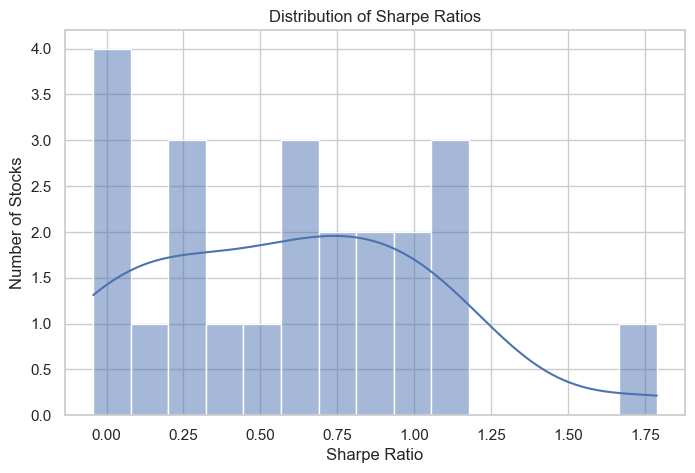

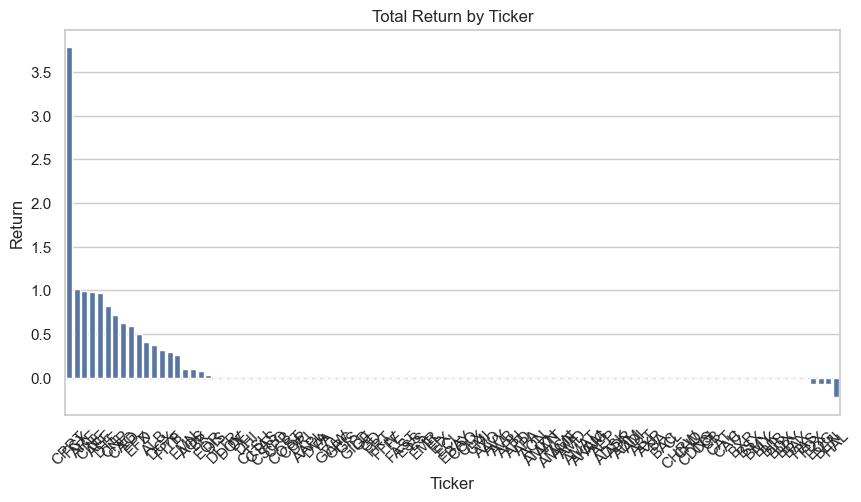

In [20]:
# Create DataFrame
perf_df = pd.DataFrame(performance_summary)

# Display summary statistics
print("\n=== Summary Statistics ===")
print(perf_df.describe().round(4))


# Mean values
mean_metrics = perf_df[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics.round(4))

# --- Plots ---
sns.set(style="whitegrid")

# 1. Histogram of Sharpe ratios
plt.figure(figsize=(8, 5))
sns.histplot(perf_df['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()

# 2. Bar chart of returns
plt.figure(figsize=(10, 5))
sorted_df = perf_df.sort_values(by='Return', ascending=False)
sns.barplot(x='Ticker', y='Return', data=sorted_df)
plt.title('Total Return by Ticker')
plt.ylabel('Return')
plt.xticks(rotation=45)
plt.show()

# 3. Optional: Save results to CSV
perf_df.to_csv('backtest_pe_results_universal_params.csv', index=False)